In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics as st

pd.set_option('display.max_columns',999)
pd.set_option('display.max_rows',3998)

import warnings
warnings.filterwarnings('ignore')

In [2]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [3]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [2]:
df = pd.read_excel('AMEO.xlsx')
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [5]:
df.drop(['Unnamed: 0','ID','CollegeCityID','CollegeID'],axis=1,inplace=True)

In [6]:
df.shape

(3998, 35)

In [7]:
df['10board'].replace({0:np.NaN},inplace=True)
df['12board'].replace({0:np.NaN},inplace=True)
df['Domain'].replace({-1:np.NaN},inplace=True)
df['JobCity'].replace({-1:np.NaN},inplace=True)
df['GraduationYear'].replace({0:np.NaN},inplace=True)

In [8]:
#null= df.isnull().sum()
#null.sort_values(ascending=False)[1:].plot(kind='bar')

In [9]:
print(round((df.isnull().sum()/len(df))*100,2))

Salary                    0.00
DOJ                       0.00
DOL                       0.00
Designation               0.00
JobCity                  11.53
Gender                    0.00
DOB                       0.00
10percentage              0.00
10board                   8.75
12graduation              0.00
12percentage              0.00
12board                   8.98
CollegeTier               0.00
Degree                    0.00
Specialization            0.00
collegeGPA                0.00
CollegeCityTier           0.00
CollegeState              0.00
GraduationYear            0.03
English                   0.00
Logical                   0.00
Quant                     0.00
Domain                    6.15
ComputerProgramming       0.00
ElectronicsAndSemicon     0.00
ComputerScience           0.00
MechanicalEngg            0.00
ElectricalEngg            0.00
TelecomEngg               0.00
CivilEngg                 0.00
conscientiousness         0.00
agreeableness             0.00
extraver

In [10]:
#we have null values in jobcity of 11% and 10th Board and 12th Board with 8% and Domain with 6% Null values.

In [11]:
#df['JobCity'].fillna(method='ffill',inplace=True)
#df['10board'].fillna(method='ffill',inplace=True)
#df['12board'].fillna(method='ffill',inplace=True)
#df['Domain'].fillna(method='ffill',inplace=True)
#df['GraduationYear'].fillna(method='ffill',inplace=True)

### Experience:

In [12]:
df['DOL'].replace({'present':'2016-01-01'},inplace=True)

In [13]:
df['DOL'] = pd.to_datetime(df['DOL'])

In [14]:
df[df['DOL']<df['DOJ']]

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
29,220000,2014-11-01,2014-04-01,java software engineer,Gurgaon,m,1992-06-11,64.00,cbse,2010,74.00,cbse,2,B.Tech/B.E.,information technology,68.00,0,Haryana,2014.0,485,375,435,0.486747,345,-1,376,-1,-1,-1,-1,-3.1994,-1.8393,0.0552,0.06230,-0.7615
92,1500000,2014-11-01,2014-07-01,application developer,Hyderabad,m,1992-01-04,79.00,state board,2009,87.90,state board,2,B.Tech/B.E.,computer science & engineering,66.00,1,Telangana,2013.0,315,435,355,0.356536,335,-1,346,-1,-1,-1,-1,0.4155,0.5454,0.9322,-0.61470,0.8637
148,105000,2014-11-01,2014-02-01,web developer,Hyderabad,m,1991-11-03,73.08,state board,2009,71.20,state board,2,B.Tech/B.E.,electronics and communication engineering,64.46,1,Telangana,2013.0,405,400,430,0.538387,385,333,-1,-1,-1,-1,-1,-0.7335,-0.9531,0.6248,0.27270,-1.8189
235,120000,2013-10-01,2013-07-01,web developer,Noida,f,1990-08-05,74.00,state board,2007,60.00,state board,2,B.Tech/B.E.,computer engineering,71.88,0,Uttar Pradesh,2012.0,415,535,485,0.450877,395,-1,-1,-1,-1,-1,-1,-0.5719,0.1888,0.2366,0.29730,-0.2875
264,325000,2014-12-01,2014-09-01,systems engineer,Mysore,f,1992-09-16,85.28,state board,2010,71.50,state board,2,B.Tech/B.E.,electronics & telecommunications,74.98,0,Karnataka,2014.0,615,525,635,0.112139,335,228,-1,-1,-1,-1,-1,0.5591,-0.2871,0.0100,0.65300,-4.5015
451,170000,2014-12-01,2014-03-01,data analyst,hyderabad,m,1992-02-26,86.80,state board,2009,88.40,state board,2,B.Tech/B.E.,electronics and communication engineering,75.20,1,Telangana,2013.0,440,545,605,NaN,375,-1,-1,-1,-1,-1,-1,0.5591,-0.1206,1.0859,-0.86820,0.0973
591,240000,2014-10-01,2014-08-01,business development manager,Noida,f,1995-01-10,60.00,state board,2010,73.00,state board,2,B.Tech/B.E.,electronics and communication engineering,75.16,0,Uttar Pradesh,2014.0,450,555,500,NaN,-1,-1,-1,-1,-1,-1,-1,1.2772,-1.1196,0.0100,0.90660,0.4805
865,200000,2014-12-01,2014-04-01,qa analyst,Hyderabad,m,1992-11-06,92.83,state board,2010,91.90,state board,2,B.Tech/B.E.,information technology,78.15,0,Andhra Pradesh,2014.0,545,505,500,0.793581,495,-1,-1,-1,-1,-1,-1,1.8517,1.0449,1.8543,-2.13600,1.0554
888,110000,2014-10-01,2014-02-01,software engineer,Pune,m,1991-01-16,66.46,state board,2009,62.81,state board,2,B.Tech/B.E.,computer engineering,61.51,0,Maharashtra,2013.0,430,340,370,0.842248,515,-1,469,-1,-1,-1,-1,1.5644,-0.1206,0.0100,0.52620,0.6721
1005,180000,2014-11-01,2014-06-01,staffing recruiter,Noida,m,1992-08-20,79.00,icse,2010,78.00,icse,2,B.Tech/B.E.,electronics and communication engineering,73.00,0,Punjab,2014.0,485,610,575,0.493596,495,324,-1,-1,-1,-1,-1,-2.0262,0.3789,-1.2196,0.39950,0.6721


In [15]:
df.DOJ, df.DOL = np.where(df.DOJ > df.DOL,[df.DOL, df.DOJ], [df.DOJ,df.DOL])

In [16]:
df[df['DOL']<df['DOJ']]

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience


In [17]:
df['Exp']= (df['DOL']-df['DOJ'])
df['Exp'] = (df['Exp'] / np.timedelta64(1, 'D')).astype(int)

In [18]:
df['Exp'] = round(df['Exp']/365.2425,1)

In [19]:
#df = df.drop(df.index[[29,92,148,235,264,451,591,865,888,1005,1355,1433,1482,1522,1541,1591,1636,1992,2044,2266,2319,2349,2407,2414,2805,2889,2946,2977,3094,3095,3109,3243,3304,
                          #3384,3391,3470,3593,3634,3700,3911]])   #DOJ is greater than DOL

### Age:

In [20]:
import datetime
df['curr_date'] = datetime.datetime(2016,1,1)

In [21]:
df['curr_date'] = pd.to_datetime(df['curr_date'])

In [22]:
df['Age'] = df['curr_date'] - df['DOB']
df['Age'] = (df['Age'] / np.timedelta64(1, 'D')).astype(int)

In [23]:
df['Age'] = round(df['Age']/365.2425,0)

In [24]:
df = df.drop(['DOJ','DOL','DOB','curr_date'],axis=1)

### JobCity:

In [25]:
len(df['JobCity'].value_counts())

338

In [26]:
df["JobCity"]=df['JobCity'].str.upper()

In [27]:
#df['JobCity'] = df["JobCity"].replace({'AMBALA CITY':'AMBALA','A-64,SEC-64,NOIDA':'GREATER NOIDA','BANGALORE ':'BANGALORE','BENGALURU':'BANGALORE','BANGLORE':'BANGALORE','BANAGLORE':'BANGALORE','BANGLORE':'BANGALORE',
#                                           'ASIFABADBANGLORE':'BANGALORE',' BANGALORE':'BANGALORE','BHOPAL ':'BHOPAL','BHUBANESHWAR':'BHUBANESWAR',
#                                          'BHUBANESWAR ':'BHUBANESWAR','BHUBNESHWAR':'BHUBANESWAR','CHANDIGARH ':'CHANDIGARH','CHENNAI ':'CHENNAI','CHENNAI & MUMBAI':'CHENNAI',
#                                          'CHENNAI, BANGALORE':'CHENNAI','DELHI/NCR':'DELHI','GAJIABAAD':'GHAZIABAAD','GAZIABAAD':'GHAZIABAAD','GHAZIABAD':'GHAZIABAAD','INDIRAPURAM, GHAZIABAD':'GHAZIABAAD','GANDHI NAGAR':'GANDHINAGAR',
#                                         'GANDHINAGAR ':'GANDHINAGAR','GURGA':'GURGAON','GURGAON ':'GURGAON','GURAGAON':'GURGAON','GURGOAN':'GURGAON','HARYANA':'CHANDIGARH','HDERABAD':'HYDERABAD','HYDERABAD ':'HYDERABAD',
#                                          'HYDERABAD(BHADURPALLY)':'HYDERABAD','JAIPUR ':'JAIPUR','KANPUR ':'KANPUR','KERAL':'THIRUVANANTHAPURAM','KOCHI/COCHIN':'KOCHI',
#                                          'KOCHI/COCHIN, CHENNAI AND COIMBATORE':'KOCHI','KOLKATA ':'KOLKATA','KOLKATA`':'KOLKATA','LUCKNOW ':'LUCKNOW',
#                                           'MADURAI ':'MADURAI','MUMBAI ':'MUMBAI','MYSORE ':'MYSORE','NAGPUR ':'NAGPUR','NASIKCITY':'NASHIK','NAVI MUMBAI':'MUMBAI',
#                                           'NAVI MUMBAI , HYDERABAD':'MUMBAI','NCR':'DELHI','NEW DELHI':'DELHI','NEW DELHI ':'DELHI','NEW DEHLI':'DELHI',
#                                          'NEW DELHI - JAISALMER':'NEW DELHI','NOIDA ':'NOIDA','ORISSA':'BHUBANESWAR','PANCHKULA ':'PANCHKULA','PUNCHKULA':'PANCHKULA','PONDI':'PONDICHERRY',
#                                          'PONDY':'PONDICHERRY','PUNR':'PUNE','PUNE ':'PUNE','RANCHI ':'RANCHI','SILIGURI ':'SILIGURI','TRIVANDRUM ':'TRIVANDRUM',
#                                          'VISAKHAPATNAM':'VIZAG','VSAKHAPTTNAM':'VIZAG',' MUMBAI':'MUMBAI',' PUNE':'PUNE',' DELHI':'DELHI',' CHENNAI':'CHENNAI','BANAGALORE':'BANGALORE','RAJASTHAN':'JAIPUR','TIRUPATHI':'TIRUPATI',
#                                      'BIHAR':'PATNA','MUZAFFARPUR':'MUZZAFARPUR','SONIPAT':'SONEPAT'})

In [28]:
len(df['JobCity'].value_counts())

261

In [29]:
df['JobRegion'] = df['JobCity'].replace({'BANGALORE':'South-South','INDORE':'North-South','CHENNAI':'South-East','GURGAON':'North-North',
                                      'MANESAR':'North-North','HYDERABAD':'South-North','BANGLORE':'South-South','NOIDA':'North-North',
                                      'KOLKATA':'East-East','PUNE':'West-West','MOHALI':'North-North','JHANSI':'North-South','DELHI':'North-North',
                                      'HYDERABAD ':'South-North','BANGALORE ':'South-South','BHUBANESWAR':'East-East','NAVI MUMBAI':'West-West',
                                      'MUMBAI':'West-West','NEW DELHI':'North-North','MANGALORE':'West-South','REWARI':'North-North',
                                       'GAZIABAAD':'North-North','BHIWADI':'North-West','MYSORE':'South-South','RAJKOT':'West-West',
                                       'GREATER NOIDA':'North-North','JAIPUR':'North-West','NOIDA ':'North-North','THANE':'West-West',
                                       'MAHARAJGANJ':'North-East','THIRUVANANTHAPURAM':'West-South','PUNCHKULA':'North-North','BHUBANESHWAR':'East-East',
                                       'PUNE ':'West-West','COIMBATORE':'West-South','DHANBAD':'East-North','LUCKNOW':'North-East','TRIVANDRUM':'West-South',
                                       'GANDHI NAGAR':'West-North','UNA':'North-North','DAMAN AND DIU':'West-West','GURGOAN':'North-North',
                                       'VSAKHAPTTNAM':'East-South','NAGPUR':'North-South','BHAGALPUR':'East-North','NEW DELHI - JAISALMER':'North-North',
                                       'AHMEDABAD':'West-North','KOCHI/COCHIN':'West-South','BANKURA':'East-North','BENGALURU':'South-South',
                                       'MYSORE ':'South-West','KANPUR ':'North-East','GURGAON ':'North-North','VIJAYAWADA':'East-South','KOCHI':'West-South',
                                       'BEAWAR':'North-West','ALWAR':'North-North','SILIGURI ':'East-North','RAIPUR':'East-West','BHOPAL':'North-South',
                                       'FARIDABAD':'North-North','JODHPUR':'West-North','UDAIPUR':'West-North','MUZAFFARPUR':'North-East','KOLKATA':'East-East',
                                       'BULANDSHAHAR':'North-North','HARIDWAR':'North-East','RAIGARH':'East-West','VISAKHAPATNAM':'East-South',
                                       'JABALPUR':'North-South','UNNAO':'North-East','AURANGABAD':'West-East','BELGAUM':'South-West','DEHRADUN':'North-North',
                                       'RUDRAPUR':'North-North','JAMSHEDPUR':'East-North','VIZAG':'East-South','NOUDA':'North-North','DHARAMSHALA':'North-North',
                                       'BANAGALORE':'South-South','HISSAR':'North-West','RANCHI':'East-North','MADURAI':'South-South','GURGA':'North-North',
                                       'CHANDIGARH':'North-North','AUSTRALIA':'Out Of India',' CHENNAI':'East-South','CHEYYAR':'South-East','MUMBAI ':'West-West',
                                       'SONEPAT':'North-North','GHAZIABAD':'North-North','PANTNAGAR':'North-East','SILIGURI':'East-North','JAGDALPUR':'South-East',
                                       'CHENNAI ':'East-South','ANGUL':'East-North','BARODA':'West-North','ARIYALUR':'South-East','JOWAI':'North-East',
                                       'KOCHI/COCHIN, CHENNAI AND COIMBATORE':'West-South','NEEMRANA':'North-West','TIRUPATHI':'South-East','LUCKNOW ':'North-East',
                                       'AHMEDABAD ':'West-North','BHUBNESHWAR':'East-East','CALICUT':'West-South','GANDHINAGAR':'West-North','DUBAI':'Out Of India',
                                       'AHMEDNAGAR':'South-West','NASHIK':'West-East','BELLARY':'South-South','LUDHIANA':'North-West','NEW DELHI ':'North-North',
                                       'MUZAFFARNAGAR':'North-East','GAGRET':'North-North','INDIRAPURAM, GHAZIABAD':'North-North','GWALIOR':'North-North',
                                       'KANPUR':'North-East','HOSPETE':'South-South','MIRYALAGUDA':'South-East',' MUMBAI':'West-West','DHARUHERA':'North-North',
                                       'MEERUT':'North-East','GANJAM':'East-South','HUBLI':'South-West','NCR':'North-North','AGRA':'North-North','TRICHY':'South-East',
                                       'KUDANKULAM ,TARAPUR':'West-West','ONGOLE':'East-South','SAMBALPUR':'South-East','PONDICHERRY':'East-South','BUNDI':'North-West',
                                       'SADULPUR,RAJGARH,DISTT-CHURU,RAJASTHAN':'North-West','AM':'West-East','BIKANER':'West-North','VADODARA':'West-West',
                                       'INDIA':'North-North','ASANSOL':'East-West','TIRUNELVELLI':'South-South','ERNAKULAM':'South-West','BILASPUR':'South-East',
                                       'CHANDRAPUR':'South-North','NANDED':'South-North','DHARMAPURI':'South-East','VANDAVASI':'East-South','ROHTAK':'North-West',
                                       'NAGPUR ':'South-North','PATNA':'East-North','SALEM':'South-East','NASIKCITY':'South-West','GANDHINAGAR ':'West-West',
                                       'TECHNOPARK, TRIVANDRUM':'South-West','BHARUCH':'West-West','TORNAGALLU':'South-South','KOLKATA ':'East-East','JASPUR':'East-West',
                                       'BURDWAN':'East-East','BHUBANESWAR ':'East-East','SHIMLA':'North-North','GAJIABAAD':'North-North','JAMMU':'North-West',
                                       'SHAHDOL':'East-West','MUVATTUPUZHA':'South-West','AL JUBAIL,SAUDI ARABIA':'Out Of India','KALMAR, SWEDEN':'Out Of India',
                                       'SECUNDERABAD':'South-North','A-64,SEC-64,NOIDA':'North-North','RATNAGIRI':'West-West','JHAJJAR':'North-West','GULBARGA':'South-West',
                                       'HYDERABAD(BHADURPALLY)':'South-North','NALAGARH':'North-West','CHANDIGARH ':'North-North','JAIPUR ':'West-North',
                                       'JEDDAH SAUDI ARABIA':'Out Of India',' DELHI':'North-North','CHENNAI, BANGALORE':'East-South','BHOPAL ':'North-South',
                                       'JAMNAGAR':'West-West','TIRUPATI':'East-West','GONDA':'North-East','ORISSA':'East-East','KHARAGPUR':'East-East',
                                       'TRIVANDRUM ':'South-West','NAVI MUMBAI , HYDERABAD':'West-West','JOSHIMATH':'North-East','BATHINDA':'West-North',
                                       'JOHANNESBURG':'Out Of India','KALA AMB ':'North-North','KARNAL':'West-East','LONDON':'Out Of India','KOTA':'West-East',
                                       'PANCHKULA':'North-North','BADDI HP':'North-North','NAGARI':'South-East','METTUR, TAMIL NADU ':'South-South','DURGAPUR':'East-East',
                                       'PONDI':'West-South','SURAT':'West-West','KURNOOL':'South-East','KOLHAPUR':'West-South','MADURAI ':'South-South','BHILAI':'East-West',
                                       ' PUNE':'West-West','HDERABAD':'South-North','BAHADURGARH':'North-North','RAYAGADA, ODISHA':'East-South','KAKINADA':'East-South',
                                       'VARANASI':'East-West','PUNR':'West-West','NELLORE':'South-East','SAHIBABAD':'East-West','HOWRAH':'East-East','TRICHUR':'West-South',
                                       'AMBALA':'West-East','KHOPOLI':'West-West','KERAL':'South-South','ROORKEE':'North-North','ALLAHABAD':'East-West','DELHI/NCR':'North-North',
                                       'PANCHKULA ':'North-North','RANCHI ':'East-North','JALANDHAR':'West-North','VAPI':'West-West','PILANI':'West-East',
                                       'MUZZAFARPUR':'East-West','RAS AL KHAIMAH':'Out Of India','BIHAR':'East-East','SINGARULI':'East-West','BANGLORE ':'South-South',
                                       'PONDY':'East-South','PHAGWARA':'West-East',' BANGALORE':'South-South','GURAGAON':'North-North','BARIPADA':'East-East',
                                       'YAMUNA NAGAR':'North-North','SHAHIBABAD':'North-North','SAMPLA':'North-North','GUWAHATI':'North-East','ROURKELA':'East-East',
                                       'BANAGLORE':'South-South','VELLORE':'East-West','DAUSA':'West-North','LATUR (MAHARASHTRA )':'South-North','MAINPURI':'East-West',
                                       'DAMMAM':'Out Of India','HALDIA':'East-East','PATIALA':'West-North','GORAKHPUR':'East-West','NEW DEHLI':'North-North',
                                       'AMBALA CITY':'West-North','KARAD':'West-West','RAJPURA':'West-North','HARYANA':'West-North','ASIFABADBANGLORE':'South-South',
                                       'SONIPAT':'West-North','BARELI':'West-East','CHENNAI & MUMBAI':'South-East','KOLKATA`':'East-East',' ARIYALUR':'South-South',
                                       'RAJASTHAN':'West-West','RAE BARELI':'East-West'
                                      })

In [30]:
df['JobRegion'].value_counts()

North-North     990
South-South     736
West-West       505
South-North     379
South-East      326
East-East       169
North-West       69
West-South       68
North-East       68
North-South      61
West-North       44
East-South       36
East-West        21
East-North       20
South-West       17
West-East        17
Out Of India     11
Name: JobRegion, dtype: int64

In [31]:
df.drop('JobCity',axis=1,inplace=True)

### 10th Board:

In [32]:
df['10board'].value_counts()

cbse                                                                        1395
state board                                                                 1164
icse                                                                         281
ssc                                                                          122
up board                                                                      85
matriculation                                                                 38
rbse                                                                          23
board of secondary education                                                  20
up                                                                            19
mp board                                                                      17
wbbse                                                                         16
sslc                                                                          16
central board of secondary e

In [33]:
df['10board'].replace({'central board of secondary education':'cbse','ssc':'state board','up board':'state board of up',
                       'matriculation':'state board','rbse':'state board of rajasthan','board of secondary education':'state board',
                       'up':'state board of up','mp board':'state board of mp','wbbse':'state board of wb','sslc':'state board of karnataka','kseeb':'state board of karnataka',
                       'upboard':'state board of up','maharashtra state board':'state board of maharashtra','karnataka state board':'state board of karnataka',
                       'state':'state board','bseb':'state board of bihar','maharashtra board':'state board of maharashtra','pseb':'state board of punjab',
                       'uttar pradesh board':'state board of up','bse':'state board','karnataka secondary education board':'state board of karnataka',
                       'karnataka secondary education examination board':'state board of karnataka','hbse':'state board of haryana','rajasthan board':'state board of rajasthan',
                       'gseb':'state board of gujarat','u p board':'state board of up','west bengal board of secondary education':'state board of wb',
                       'matriculation board':'state board','mp':'state board of mp','bseb,patna':'state board of bihar',
                       'secondary school of education':'state board','uttarakhand board':'state board of uttarakhand','bse,orissa':'state board of orissa',
                       'anglo indian':'state board','maharashtra':'state board of maharashtra','hbsc':'state board of haryana',
                       'rajasthan board of secondary education':'state board of rajasthan','bihar board':'state board of bihar',
                       'board of secondary education,ap':'state board of ap','jkbose':'state board of j&k','board of school education harayana':'state board of haryana',
                       'hse':'state board of orissa','kerala state board':'state board of kerala','mpboard':'state board of mp','mp board bhopal':'state board of mp',
                       'karnataka board':'state board of karnataka','board of secondary education,andhra pradesh':'state board of ap',
                       'board of secondary education, rajasthan':'state board of rajasthan','pune':'state board of maharashtra','matric board':'state board of bihar',
                       'bihar school examination board':'state board of bihar','board of secondary education, andhra pradesh':'state board of ap',
                       'karnataka state secondary education board':'state board of karnataka','karnataka secondary education':'state board of karnataka',
                       'nagpur':'state board of maharashtra','mpbse':'state board of mp','bseb, patna':'state board of bihar','karnataka':'state board of karnataka',
                       'latur':'state board of maharashtra','sslc board':'state board of karnataka','tamilnadu state board':'state board of tamilnadu','kseb':'state board karnataka',
                       'hsc':'state board','bse, odisha':'state board of orissa','cbse board':'cbse','jseb':'state board of jharkhand',
                       'andhra pradesh state board':'state board of ap','jawahar navodaya vidyalaya':'state board',
                       'tamilnadu matriculation board':'state board of tamilnadu','j & k bord':'state board of j&k',
                       'uttaranchal state board':'state board of uttaranchal','mhsbse':'state board of maharashtra','jbse,jharkhand':'state board of jharkhand',
                       'council for indian school certificate examination':'state board',
                       'state board - west bengal board of secondary education : wbbse':'state board of wb','karnataka secondary school of examination':'state board of karnataka',
                       'gsheb':'state board of gujarat','up board,allahabad':'state board of up','dav public school sec 14':'state board of haryana',
                       'nashik board':'state board of maharashtra','secondary education board of rajasthan':'state board of rajasthan','board of secondary education(bse) orissa':'state board of orissa',
                       'state board (jac, ranchi)':'state board of jharkhand','u p':'state board of up','karnataka education board (keeb)':'state board of karnataka',
                       'bseb ,patna':'state board of bihar','maharashtra sate board':'state board of maharashtra','karnataka sslc board bangalore':'state board of karnataka',
                       'ksseb(karnataka state board)':'state board of karnataka','ua':'state board of uttarakhand','board of intermediate education':'state board of ap',
                       'ssc regular':'state board','mumbai board':'state board of maharashtra','state borad hp':'state board of hp','ghseb':'state board of gujarat',
                       'sarada high scchool':'state board','ap state board':'state board of ap','rajasthan board ajmer':'state board of rajasthan',
                       'cgbse raipur':'state board of chhattisgarh','hsce':'state board of orissa','little jacky matric higher secondary school':'state board',
                       'karnataka education board':'state board of karnataka','gujarat board':'state board of gujarat','gyan bharati school':'state board',
                       'karnataka board of higher education':'state board of karnataka','ms board':'state board of maharashtra','bsepatna':'state board of bihar',
                       'kiran english medium high school':'state board','uttrakhand board':'state board of uttarakhand',
                       'dav public school,hehal':'state board of jharkhand','board of school education uttarakhand':'state board of uttarakhand',
                       'up board , allahabad':'state board of up','delhi public school':'cbse','nagpur board':'state board of maharashtra',
                       'maharashtra satate board':'state board of maharashtra','mirza ahmed ali baig':'state board',
                       'haryana board of school education':'state board of haryana','board of high school and intermediate education uttarpradesh':'state board of up',
                       'pune board':'state board of maharashtra','bihar secondary education board,patna':'state board of bihar',
                       'ap state board for secondary education':'state board of ap','board of secondary education - andhra pradesh':'state board of ap',
                       'nasik':'state board of maharshtra','jharkhand secondary examination board,ranchi':'state board of jharkhand',
                       'ssc maharashtra board':'state board of maharashtra','board of secondary education orissa':'state board of orissa',
                       'central board of secondary education, new delhi':'cbse','wbbsce':'state board of wb','bse,odisha':'state board of orissa',
                       'board of secondary education (bse) orissa':'state board of orissa','west bengal board of secondary eucation':'state board of wb',
                       'maharashtra state(latur board)':'state board of maharshtra','nagpur board,nagpur':'state board of maharashtra','karnataka state examination board':'state board of karnataka',
                       'icse board , new delhi':'icse','aurangabad board':'state board of maharashtra','maharashtra nasik board':'state board of maharashtra',
                       'up bourd':'state board of up','karantaka secondary education and examination borad':'state board of karnataka','sslc,karnataka':'state board of karnataka',
                       'board of secondary education,orissa':'state board of orissa','maharashtra state board mumbai divisional board':'state board of maharasthra',
                       'sslc,karnataka':'state board of karnataka','board of secondary education,orissa':'state board of orissa','maharashtra state board mumbai divisional board':'state board of maharashtra',
                       'secondary school cerfificate':'state board','mp state board':'state board','delhi board':'state board','kerala state technical education':'state board',
                       'board of secondary education,rajasthan(rbse)':'state board of rajasthan','state board of secondary education, ap':'state board of ap',
                       'kolhapur divisional board, maharashtra':'state board of maharashtra','ksbe':'state board of karnataka',
'jharkhand academic council':'state board of jharkhand',
'maharashtra state board for ssc':'state board of maharashtra', 
'bsc,orissa':'state board of orissa',
'bse(board of secondary education)':'state board',
'j&k state board of school education':'state board of j&k', 
'state board of secondary education,andhra pradesh':'state board of ap',
'state board of karnataka':'state board of karnataka',
'secondary school certificate':'state board',
'msbshse,pune':'state board of maharashtra',
'state(karnataka board)':'state board of karnataka',
'state board ':'state board',
'apsche':'state board of ap',
'himachal pradesh board':'state board of hp',
'ssc board of andrapradesh':'state board of ap',
'icse board':'icse',
'himachal pradesh board of school education':'state board of hp',
'rbse,ajmer':'state board of rajasthan', 
'education board of kerala':'state board of kerala',
'apssc':'state board of ap',
'bharathi matriculation school':'state board',
'gujarat state board':'state board of gujarat',
'stmary higher secondary':'state board',
'maharashtra state board,pune':'state board of maharashtra',
'cbse[gulf zone]':'cbse',
'kerala university':'state board of kerala',
'up(allahabad)':'state board of up',
'board of secondary education,andhara pradesh':'state board of ap',
'karnataka secondary eduction':'state board of karnataka',
'latur board':'state board of maharashtra',
'ssc-andhra pradesh':'state board of ap',
'national public school':'cbse',
'tamil nadu state':'state board of tamilnadu',
'stjosephs girls higher sec school,dindigul':'state board of tamilnadu',
'board ofsecondary education,ap':'state board of ap',
'karnataka board of secondary education':'state board of karnataka',
'bihar examination board, patna':'state board of bihar',
'board of secondaray education':'state board',
'state board of secondary education( ssc)':'state board',
'jharkhand acedemic council':'state board of jharkhand',
'seba(assam)':'state board of assam',
'nagpur divisional board':'state board of maharashtra',
'maharashtra state board of secondary & higher secondary education':'state board of maharashtra',
'hse,board':'state board of orissa',
'cicse':'icse',
'maharastra board':'state board of maharashtra',
'west bengal  board of secondary education':'state board of wb',
'kseeb(karnataka secondary education examination board)':'state board of karnataka',
'metric':'state board',
'uttaranchal shiksha avam pariksha parishad':'state board of uttaranchal',
'maharashtra state boar of secondary and higher secondary education':'state board of maharashtra',
'board of secondary education,odisha':'state board of orissa',
'cgbse':'state board of chhattisgarh',
'holy cross matriculation hr sec school':'state board',
'sss pune':'state board of maharashtra',
'west bengal board of secondary examination (wbbse)':'state board of wb',
'up-board':'state board of up',
'andhra pradesh board ssc':'state board of ap',
'uttranchal board':'state board of uttaranchal',
'jharkhand secondary education board':'state board of jharkhand',
'maharashtra board, pune':'state board of maharashtra',
'don bosco maatriculation school':'cbse',
'haryana board of school education,(hbse)':'state board of haryana',
'bihar school examination board patna':'state board of bihar',
'biharboard':'state board of bihar',
'board of school education haryana':'state board of haryana',
'up baord':'state board of up',
'bsemp':'state board of mp',
'seba':'state board of assam',
'kerala':'state board of kerala',
'cbsc':'cbse',
'kalaimagal matriculation higher secondary school':'state board of tamilnadu',
'madhya pradesh board':'state board of mp',
'up bord':'state board of up',
'secondary board of rajasthan':'state board of rajasthan',
'board of ssc education andhra pradesh':'state board of ap',
'karnataka secondory education board':'state board of karnataka',
'kolhapur':'state board of maharashtra',
'bihar':'state board of bihar',
'sri kannika parameswari highier secondary school, udumalpet':'state board of tamilnadu',
'kea':'state board of karnataka',
'stjoseph of cluny matrhrsecschool,neyveli,cuddalore district':'state board of tamilnadu',
'cbse ':'cbse',
'board of secondary education rajasthan':'state board of rajasthan',
'school secondary education, andhra pradesh':'state board of ap',
'bright way college, (up board)':'state board of up',
'certificate of middle years program of ib':'state board',
'upbhsie':'state board of up',
#'cluny':'state board',
'jharkhand accademic council':'state board of jharkhand',
'aisse':'cbse',
'hse,orissa':'state board of orissa',
'maharashtra state board pune':'state board of maharashtra',
'rbse (state board)':'state board of rajasthan',
'karnataka secondary board':'state board of karnataka',
'tn state board':'state board of tamilnadu',
'board of  secondary education':'state board',
'maharashtra state board of secondary and higher secondary education,pune':'state board of maharashtra',
'up board allahabad':'state board of up',
'maharashtra state board of secondary and higher secondary education':'state board of maharashtra',
'jharkhand secondary examination board (ranchi)':'state board of jharkhand',
'board of secondary school education':'state board',
'secondary state certificate':'state board',
"stmary's convent inter college":"state board",
'jharkhand secondary board':'state board of jharkhand',
'state bord':'state board',
'maticulation':'state board',
'mp-bse':'state board of mp',
'secondary school education':'state board',
'bseb patna':'state board of bihar',
'state board of secondary education, andhra pradesh':'state board of ap',
'punjab school education board, mohali':'state board of punjab',
'ksseb':'state board of karnataka',
'stateboard':'state board',
'uttar pradesh':'state board of up',
'matric':'state board',
'board of ssc':'state board',
'board of secendary education orissa':'state board of orissa',
'board secondary  education':'state board',
'state boardmp board ':'state board of mp',
'up borad':'state board of up',
'karnataka state education examination board':'state board of karnataka'},inplace=True)

In [34]:
df['10board'].value_counts()

cbse                           1418
state board                    1411
icse                            284
state board of up               144
state board of karnataka         80
state board of maharashtra       56
state board of rajasthan         41
state board of mp                31
state board of bihar             30
state board of wb                26
state board of ap                24
state board of orissa            18
state board of haryana           15
state board of jharkhand         12
state board of tamilnadu          9
state board of punjab             9
state board of gujarat            9
state board of uttarakhand        7
state board of kerala             5
state board of j&k                4
state board of hp                 3
state board of uttaranchal        3
state board of maharshtra         2
state board of assam              2
state board karnataka             2
state board of chhattisgarh       2
cluny                             1
Name: 10board, dtype: int64

### 12th Board:

In [35]:
df['12board'].value_counts()

cbse                                                                           1400
state board                                                                    1254
icse                                                                            129
up board                                                                         87
isc                                                                              45
board of intermediate                                                            36
board of intermediate education                                                  31
up                                                                               20
rbse                                                                             19
mp board                                                                         17
bie                                                                              15
chse                                                                        

In [36]:
df['12board'].replace({'icse':'isc','board of intermediate':'state board of ap','board of intermediate education':'state board of ap',
                     'up':'state board of up','rbse':'state board of rajasthan','mp board':'state board of mp','bie':'state board of ap',
                      'chse':'state board of orissa','ipe':'state board of telangana','hsc':'state board of maharashtra','central board of secondary education':'cbse',
                      'maharashtra state board':'state board of maharashtra','wbchse':'state board of wb','maharashtra board':'state board of maharashtra',
                      'puc':'state board of karnataka','matriculation':'state board','hbse':'state board of haryana','state':'state board',
                      'upboard':'state board of up','nios':'cbse','uttar pradesh board':'state board of up','board of intermediate education,ap':'state board of ap',
                      'stateboard':'state board','bseb':'state board of bihar','pseb':'state board of punjab','ssc':'state board','karnataka state board':'state board of karnataka',
                     'rajasthan board':'state board of rajasthan','u p board':'state board of up','west bengal council of higher secondary education':'state board of wb',
                      'msbte':'state board of maharashtra','biec,patna':'state board of bihar','intermediate board':'state board of telangana','chse,orissa':'state board of orissa',
                      'karnataka pre university board':'state board of karnataka','bieap':'state board of ap','mp':'state board of mp','uttarakhand board':'state board of uttarakhand',
                      'uttar pradesh':'state board of up','sbtet':'state board of telangana','karnataka pre-university board':'state board of karnataka','jharkhand academic council':'state board of jharkhand',
                      'bihar intermediate education council':'state board of bihar','board of intermediate education, andhra pradesh':'state board of ap',
                     'pre-university':'state board of karnataka','karnataka pu board':'state board of karnataka','board of intermediate education, ap':'state board of ap',
                      'maharashtra':'state board of maharashtra','department of pre-university education':'state board of karnataka','pre university board':'state board of karnataka',
                      'biec':'state board of bihar','apbie':'state board of ap','kerala state board':'state board of kerala','tamilnadu state board':'state board of tamilnadu',
                      'board of secondary education rajasthan':'state board of rajasthan','jkbose':'state board of j&k','pue':'state board of karnataka','chse,odisha':'state board of orissa',
                      'pre-university board':'state board of karnataka','wbbhse':'state board of wb','tamil nadu state board':'state board of tamilnadu','rajasthan board of secondary education':'state board of rajasthan',
                      'bihar board':'state board of bihar','ghseb':'state board of gujarat','latur':'state board of maharashtra','karnataka board':'state board of karnataka','nagpur':'state board of maharashtra',
                     'gsheb':'state board of gujarat','bte up':'state board of up',' board of intermediate':'state board of ap',
                    'board of intermediate ap':'state board of ap','board of intermediate education,andhra pradesh':'state board of ap',
                      'ibe':'state board',
                       'mpbse':'state board of mp','state board of technical education':'state board of telangana','certificate for higher secondary education (chse)orissa':'state board of orissa',
                      'latur board':'state board of maharashtra','tamilnadu stateboard':'state board of tamilnadu','st joseph hr sec school':'state board of tamilnadu',
                      'tn state board':'state board of tamilnadu','andhpradesh board of intermediate education':'state board of ap','uttaranchal shiksha avam pariksha parishad':'state board of uttaranchal',
                      'board of secondary education, rajasthan':'state board of rajasthan','board of intermediate education,andra pradesh':'state board of ap',
                      ' upboard':'state board of up','msbshse,pune':'state board of maharashtra','nagpur board,nagpur':'state board of maharashtra','kolhapur divisional board, maharashtra':'state board of maharashtra',
                      'tamil nadu state':'state board of tamilnadu','karnataka pre-university':'state board of karnataka','ks rangasamy institute of technology':'state board of tamilnadu',
                      'board of intermidiate':'state board of ap','mbose':'state board of meghalaya','board of intermediate education:ap,hyderabad':'state board of ap',
                      'intermidiate':'state board of ap','holy cross matriculation hr sec school':'state board of tamilnadu','state board of technical education harayana':'state board of haryana',
                     'bice':'state board','secnior secondary education board of rajasthan':'state board of rajasthan','bte,delhi':'state board of delhi',
                      'maharashtra state board of secondary & higher secondary education':'state board of maharashtra','gseb':'state board of gujarat','mpboard':'state board of mp',
                      'andhra board':'state board of ap','haryana state board of technical education chandigarh':'state board of haryana','karnataka board of university':'state board of karnataka',
                       'intermideate':'state board of ap','jharkhand acamedic council (ranchi)':'state board of jharkhand','science college':'state board','uo board':'state board of up',
                      'central board of secondary education, new delhi':'cbse','himachal pradesh board':'state board of hp',
                      'board of technicaleducation ,delhi':'state board of delhi','board of technical education':'state board of telangana',
                      'karnataka state examination board':'state board of karnataka','dav public school sec 14':'state board of haryana','board of high school and intermediate education uttarpradesh':'state board of up',
                      'ap board':'state board of ap','board of higher secondary orissa':'state board of orissa','apsb':'state board','ap intermediate board':'state board of ap',
                      'karnataka secondary education board':'state board of karnataka','sri kannika parameswari highier secondary school, udumalpet':'state board of tamilnadu',
                      'west bengal state council of technical education':'state board of wb','higher secondary':'state board','hse':'state board of orissa','jawahar higher secondary school':'cbse',
                      'karnataka sslc':'state board of karnataka','uttranchal board':'state board of uttaranchal','karnataka state pre- university board':'state board of karnataka',
                      'maharashtra state(latur board)':'state board of maharashtra','bihar school examination board patna':'state board of bihar','puboard':'state board of karnataka',
                      'department of pre-university eduction':'state board of karnataka','scte & vt (diploma)':'state board of orissa','state board (jac, ranchi)':'state board of jharkhand',
                      'board of secondary education':'state board of telangana','all india board':'state board','maharashtra state boar of secondary and higher secondary education':'state board maharashtra',
                      'mpc':'state board of telangana','scte and vt ,orissa':'state board of orissa','gujarat board':'state board of gujarat','up baord':'state board of up','pu  board karnataka':'state board of karnataka',
                      'karnataka state':'state board of karnataka','bihar':'state board of bihar','stmiras college for girls':'state board of maharashtra','pu board ,karnataka':'state board of karnataka',
                      'board of secondary education,rajasthan(rbse)':'state board of rajasthan','kolhapur':'state board of maharashtra','lucknow public college':'state board of up',
                      'up bourd':'state board of up','dte':'state board of telangana','j & k board':'state board of j&k','apbsc':'state board of ap','pre university board, karnataka':'state board of karnataka',
                      'state board - tamilnadu':'state board of tamilnadu','karnatak pu board':'state board of karnataka','maharashtra board, pune':'state board of maharashtra','karnataka pre unversity board':'state board of karnataka',
                      'hsc maharashtra board':'state board of maharashtra','state  board of intermediate education, andhra pradesh':'state board of ap',
                     'j&k state board of school education':'state board of j&k','pu':'state board of karnataka','state broad':'state board','jharkhand acedemic council':'state board of jharkhand',
                       'higher secondary state certificate':'state board of maharashtra','pre university board of karnataka':'state board of karnataka',
    'karanataka secondary board':'state board of karnataka','srv girls higher sec school,rasipuram':'state board of tamilnadu','up board allahabad':'state board of up',
                   'diploma ( maharashtra state board of technical education)':'state board of maharashtra','sri sankara vidyalaya':'state board of telangana',
                       'department of pre-university education, bangalore':'state board of karnataka','uttaranchal state board':'state board of uttaranchal',
                       'cgbse':'state board of chhattisgarh','kerala state hse board':'state board of kerala','aissce':'cbse','msbte (diploma in computer technology)':'state board',
                'chse(concil of higher secondary education)':'state board of orissa','maharashtra nasik board':'state board of maharashtra','jiec':'state board of jharkhand',
                       'kerala university':'state board of kerala','preuniversity board(karnataka)':'state board of karnataka','gshseb':'state board of gujarat','hsc pune':'state board of maharashtra',
                       'uttrakhand board':'state board of uttarakhand','maharashtra satate board':'state board of maharashtra','cgbse raipur':'state board of chhattisgarh','jharkhand accademic council':'state board of jharkhand',
                       'nagpur divisional board':'state board of maharashtra','nasik':'state board of maharashtra','borad of intermediate':'state board of ap','technical board, punchkula':'state board of haryana',
                       'jaycee matriculation school':'state board of tamilnadu','chse, odisha':'state board of orissa','intermedite':'state board of ap','board of intermidiate examination':'state board of ap',
                       'hslc (tamil nadu state board)':'state board of tamilnadu','matric board':'state board of bihar','higher secondary education':'state board of orissa',
                       'tamilnadu higher secondary education board':'state board of tamilnadu','state board - west bengal council of higher secondary education : wbchse':'state board of wb',
                       'intermediate board of education':'state board of ap','state syllabus':'state board of ap','dpue':'state board of karnataka','department of technical education':'state board of telangana',
                       'board of school education uttarakhand':'state board of uttarakhand','state board of karnataka':'state board of karnataka','jharkhand board':'state board of jharkhand',
                       'board of school education harayana':'state board of haryana','intermediate board of education,andhra pradesh':'state board of ap','nashik board':'state board of maharashtra',
                       'west bengal board of higher secondary education':'state board of wb','jstb,jharkhand':'state board of jharkhand','pune board':'state board of maharashtra',
                       'chsc':'state board of orissa','up(allahabad)':'state board of up','cbse board':'cbse','west bengal council of higher secondary eucation':'state board of wb',
                       'scte vt orissa':'state board of orissa','madhya pradesh board':'state board of mp','bsemp':'state board of mp','aurangabad board':'state board of maharashtra',
                       'aligarh muslim university':'state board of up','gseb/technical education board':'state board of gujarat','dav public school':'state board',
                       'biec, patna':'state board of bihar','electonincs and communication(dote)':'state board of tamilnadu','amravati divisional board':'state board of maharashtra',
                       'karnataka pu':'state board of karnataka','diploma in engg (e &tc) tilak maharashtra vidayapeeth':'state board of maharshtra','punjab state board of technical education & industrial training, chandigarh':'state board of punjab',
                       'ua':'state board of uttarakhand','pub':'state board','board of intermediate(bie)':'state board of ap','jyoti nivas':'state board of karnataka','board of secondary school of education':'state board of ap',
                       'msbte pune':'state board of maharashtra','secondary board of rajasthan':'state board of rajsthan','bseb, patna':'state board of bihar','mp board bhopal':'state board of mp',
                       'tamil nadu polytechnic':'state board of tamilnadu','ms board':'state board of maharashtra','jaswant modern school':'state board of mp','punjab state board of technical education & industrial training':'state board of punjab',
                       'stateboard/tamil nadu':'state board of tamilnadu','cbsc':'cbse','department of pre university education':'state board of karnataka',
                       'karnataka education board':'state board of karnataka','ssm srsecschool':'state board of haryana','sbte, jharkhand':'state board of jharkhand',
                       'government polytechnic mumbai , mumbai board':'state board of maharashtra','diploma(msbte)':'state board of maharashtra','kerala':'state board of kerala',
                       'baord of intermediate education':'state board of ap','cicse':'state board','sda matric higher secondary school':'state board of tamilnadu',
                       'international baccalaureate (ib) diploma':'state board','hbsc':'state board of haryana','psbte':'state board of punjab','p u board, karnataka':'state board of karnataka',
                       'sjrcw':'state board of karnataka','state bord':'state board','intermediate board of andhra pardesh':'state board of ap',
                       'isce':'isc','maharashtra state board mumbai divisional board':'state board of maharashtra','hisher seconadry examination(state board)':'state board',
                       'ahsec':'state board of assam','dav public school,hehal':'state board of jharkhand','board of intermidiate education,ap':'state board of ap',
                       'state board of technical education and training':'state board of telangana','karnataka board secondary education':'state board of karnataka',
                       'biec-patna':'state board of bihar','bihar intermediate education council, patna':'state board of bihar','bright way college, (up board)':'state board of up',
                       'boardofintermediate':'state board of ap','council for indian school certificate examination':'isc','cbese':'cbse',
                       'biec patna':'state board of bihar','intermediate board examination':'state board of ap','isc board , new delhi':'isc',
                       'board of intrmediate education,ap':'state board of ap','cbse,new delhi':'cbse','sri chaitanya junior kalasala':'state board of ap',
                       'intermediate state board':'state board of ap','dote (diploma - computer engg)':'state board of tamilnadu','narayana junior college':'state board of ap',
                       's j polytechnic':'state board of karnataka','department of technical education, bangalore':'state board of karnataka','madhya pradesh open school':'state board of mp',
                       'mp-bse':'state board of mp','board of intermediate,ap':'state board of ap','karnataka secondary education':'state board of karnataka','board of intermeadiate education':'state board of ap',
                       'bteup':'state board of up','pu board karnataka':'state board of karnataka','staae board':'state board','maharashtra state board for hsc':'state board of maharashtra',
                       'ap board for intermediate education':'state board of ap','dept of pre-university education':'state board of karnataka','diploma in computers':'state board',
                       'stjoseph of cluny matrhrsecschool,neyveli,cuddalore district':'state board of tamilnadu','rajasthan board ajmer':'state board of rajasthan',
                    'upbhsie':'state board of up','board of intermediate education,hyderabad':'state board of telangana','andhra pradesh board of secondary education':'state board of ap',
                       'intermediate council patna':'state board of bihar','govt of karnataka department of pre-university education':'state board of karnataka',
                    'board of intmediate education ap':'state board of ap','rbse (state board)':'state board of rajasthan','andhra pradesh':'state board of ap',
                       'wbscte':'state board of wb','board fo intermediate education, ap':'state board of ap','up board,allahabad':'state board of up',
                       'pre university':'state board of karnataka','department of pre-university education(government of karnataka)':'state board of karnataka',
                       'west bengal council of higher secondary examination (wbchse)':'state board of wb','directorate of technical education,banglore':'state board of karnataka',
                       'scte&vt':'state board of orissa','state board':'state board','up-board':'state board of up','up board , allahabad':'state board of up',
                       'isc board':'isc','nagpur board':'state board of maharashtra','andhra pradesh state board':'state board of ap','state board of technical eduction panchkula':'state board of haryana',
                       'u p':'state board of up',
                      'up board':'state board of up',
                      'intermediate':'state board of ap',
                      'pu board':'state board of karnataka','himachal pradesh board of school education':'state board of hp',
                       'board of higher secondary examination, kerala':'state board of kerala',
                       'state board ':'state board','bciec,patna':'state board of bihar','up bord':'state board of up','kea':'state board of karnataka'
                      },inplace=True)
                       

In [37]:
df['12board'].value_counts()

cbse                           1426
state board                    1301
isc                             178
state board of ap               151
state board of up               148
state board of karnataka         87
state board of maharashtra       75
state board of rajasthan         33
state board of orissa            31
state board of telangana         30
state board of mp                30
state board of bihar             27
state board of wb                24
state board of tamilnadu         22
state board of haryana           16
state board of jharkhand         12
state board of punjab             9
state board of gujarat            8
state board of uttarakhand        7
state board of kerala             6
state board of j&k                4
state board of uttaranchal        3
state board of hp                 2
state board of chhattisgarh       2
state board of delhi              2
state board of assam              1
state board of maharshtra         1
state board of rajsthan     

### Specialization:

In [38]:
len(df['Specialization'].value_counts())

46

### College GPA:

In [39]:
a = [lambda x:x*9.5 if x<10 else x]
df['collegeGPA'] = df['collegeGPA'].apply(a)

### Domain:

In [40]:
df['ComputerProgramming'].replace(-1,0,inplace=True),
df['ElectronicsAndSemicon'].replace(-1,0,inplace=True),
df['ComputerScience'].replace(-1,0,inplace=True),
df['MechanicalEngg'].replace(-1,0,inplace=True),
df['ElectricalEngg'].replace(-1,0,inplace=True),
df['TelecomEngg'].replace(-1,0,inplace=True),
df['CivilEngg'].replace(-1,0,inplace=True)

In [41]:
df['Score'] = df[['ComputerProgramming','ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg','ElectricalEngg', 'TelecomEngg', 'CivilEngg']].max(axis=1)

In [42]:
df['Score'].replace({0:np.NaN},inplace=True)

In [43]:
df['Score'].fillna(method='ffill',inplace=True)

In [44]:
df[['ComputerProgramming','ElectronicsAndSemicon','ComputerScience','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg','Score']].head()

,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,Score
0,445,0,0,0,0,0,0,445.0
1,0,466,0,0,0,0,0,466.0
2,395,0,0,0,0,0,0,395.0
3,615,0,0,0,0,0,0,615.0
4,0,233,0,0,0,0,0,233.0


In [45]:
df['Domain_Test'] = df[['ComputerProgramming','ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg','ElectricalEngg', 'TelecomEngg', 'CivilEngg']].idxmax(axis=1)

In [46]:
df['CP'] = np.where(df['Domain_Test']=='ComputerProgramming',1,0)
df['ES'] = np.where(df['Domain_Test']=='ElectronicsAndSemicon',1,0)
df['CS'] = np.where(df['Domain_Test']=='ComputerScience',1,0)
df['ME'] = np.where(df['Domain_Test']=='MechanicalEngg',1,0)
df['EE'] = np.where(df['Domain_Test']=='ElectricalEngg',1,0)
df['TE'] = np.where(df['Domain_Test']=='TelecomEngg',1,0)
df['CE'] = np.where(df['Domain_Test']=='CivilEngg',1,0)

In [47]:
df.drop(['ComputerProgramming','ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg','ElectricalEngg', 'TelecomEngg', 'CivilEngg'],axis=1,inplace=True)

In [48]:
df.head()

,Salary,Designation,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Exp,Age,JobRegion,Score,Domain_Test,CP,ES,CS,ME,EE,TE,CE
0,420000,senior quality engineer,f,84.3,state board of ap,2007,95.8,state board of ap,2,B.Tech/B.E.,computer engineering,78.00,0,Andhra Pradesh,2011.0,515,585,525,0.635979,0.9737,0.8128,0.5269,1.35490,-0.4455,3.6,26.0,South-South,445.0,ComputerProgramming,1,0,0,0,0,0,0
1,500000,assistant manager,m,85.4,cbse,2007,85.0,cbse,2,B.Tech/B.E.,electronics and communication engineering,70.06,0,Madhya Pradesh,2012.0,695,610,780,0.960603,-0.7335,0.3789,1.2396,-0.10760,0.8637,2.3,26.0,North-South,466.0,ElectronicsAndSemicon,0,1,0,0,0,0,0
2,325000,systems engineer,f,85.0,cbse,2010,68.2,cbse,2,B.Tech/B.E.,information technology,70.00,0,Uttar Pradesh,2014.0,615,545,370,0.450877,0.2718,1.7109,0.1637,-0.86820,0.6721,1.6,23.0,South-East,395.0,ComputerProgramming,1,0,0,0,0,0,0
3,1100000,senior software engineer,m,85.6,cbse,2007,83.6,cbse,1,B.Tech/B.E.,computer engineering,74.64,1,Delhi,2011.0,635,585,625,0.974396,0.0464,0.3448,-0.3440,-0.40780,-0.9194,4.5,26.0,North-North,615.0,ComputerProgramming,1,0,0,0,0,0,0
4,200000,get,m,78.0,cbse,2008,76.8,cbse,2,B.Tech/B.E.,electronics and communication engineering,73.90,0,Uttar Pradesh,2012.0,545,625,465,0.124502,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,1.0,25.0,North-North,233.0,ElectronicsAndSemicon,0,1,0,0,0,0,0


In [49]:
len(df['Designation'].value_counts())

419

# Outliers:

In [50]:
q1_s = df['Salary'].quantile(q= 0.25)
q3_s = df['Salary'].quantile(q= 0.75)
iqr_s = q3_s-q1_s
Salary_o = df[(df['Salary']<(q1_s-1.5*iqr_s)) | (df['Salary']>(q3_s+1.5*iqr_s))].shape[0]
Salary_o

109

In [51]:
q1_10 = df['10percentage'].quantile(q= 0.25)
q3_10 = df['10percentage'].quantile(q= 0.75)
iqr_10 = q3_10-q1_10
tenthpercentage = df[(df['10percentage']<(q1_10-1.5*iqr_10)) | (df['10percentage']>(q3_10+1.5*iqr_10))].shape[0]
tenthpercentage

30

In [52]:
q1_12 = df['12percentage'].quantile(q= 0.25)
q3_12 = df['12percentage'].quantile(q= 0.75)
iqr_12 = q3_12-q1_12
twelvethpercentage = df[(df['12percentage']<(q1_12-1.5*iqr_12)) | (df['12percentage']>(q3_12+1.5*iqr_12))].shape[0]
twelvethpercentage

1

In [53]:
q1_c = df['collegeGPA'].quantile(q= 0.25)
q3_c = df['collegeGPA'].quantile(q= 0.75)
iqr_c = q3_c-q1_c
CollegeGPA_o = df[(df['collegeGPA']<(q1_c-1.5*iqr_c)) | (df['collegeGPA']>(q3_c+1.5*iqr_c))].shape[0]
CollegeGPA_o

26

In [54]:
q1_e = df['English'].quantile(q= 0.25)
q3_e = df['English'].quantile(q= 0.75)
iqr_e = q3_e-q1_e
English_o = df[(df['English']<(q1_e-1.5*iqr_e)) | (df['English']>(q3_e+1.5*iqr_e))].shape[0]
English_o

15

In [55]:
q1_l = df['Logical'].quantile(q= 0.25)
q3_l = df['Logical'].quantile(q= 0.75)
iqr_l = q3_l-q1_l
Logical_o = df[(df['Logical']<(q1_l-1.5*iqr_l)) | (df['Logical']>(q3_l+1.5*iqr_l))].shape[0]
Logical_o

18

In [56]:
q1_q = df['Quant'].quantile(q= 0.25)
q3_q = df['Quant'].quantile(q= 0.75)
iqr_q = q3_q-q1_q
Quant_o = df[(df['Quant']<(q1_q-1.5*iqr_q)) | (df['Quant']>(q3_q+1.5*iqr_q))].shape[0]
Quant_o

25

In [57]:
q1_d = df['Domain'].quantile(q= 0.25)
q3_d = df['Domain'].quantile(q= 0.75)
iqr_d = q3_d-q1_d
Domain_o = df[(df['Domain']<(q1_d-1.5*iqr_d)) | (df['Domain']>(q3_d+1.5*iqr_d))].shape[0]
Domain_o

0

In [58]:
q1_c = df['conscientiousness'].quantile(q= 0.25)
q3_c = df['conscientiousness'].quantile(q= 0.75)
iqr_c = q3_c-q1_c
conscientiousness_o = df[(df['conscientiousness']<(q1_c-1.5*iqr_c)) | (df['conscientiousness']>(q3_c+1.5*iqr_c))].shape[0]
conscientiousness_o

39

In [59]:
q1_a = df['agreeableness'].quantile(q= 0.25)
q3_a= df['agreeableness'].quantile(q= 0.75)
iqr_a = q3_a-q1_a
agreeableness_o = df[(df['agreeableness']<(q1_a-1.5*iqr_a)) | (df['agreeableness']>(q3_a+1.5*iqr_a))].shape[0]
agreeableness_o

123

In [60]:
q1_ex = df['extraversion'].quantile(q= 0.25)
q3_ex = df['extraversion'].quantile(q= 0.75)
iqr_ex = q3_ex-q1_ex
extraversion_o = df[(df['extraversion']<(q1_ex-1.5*iqr_ex)) | (df['extraversion']>(q3_ex+1.5*iqr_ex))].shape[0]
extraversion_o

40

In [61]:
q1_n = df['nueroticism'].quantile(q= 0.25)
q3_n = df['nueroticism'].quantile(q= 0.75)
iqr_n = q3_n-q1_n
nueroticism_o = df[(df['nueroticism']<(q1_n-1.5*iqr_n)) | (df['nueroticism']>(q3_n+1.5*iqr_n))].shape[0]
nueroticism_o

15

In [62]:
q1_o = df['openess_to_experience'].quantile(q= 0.25)
q3_o = df['openess_to_experience'].quantile(q= 0.75)
iqr_o = q3_o-q1_o
openess_to_experience_o = df[(df['openess_to_experience']<(q1_o-1.5*iqr_o)) | (df['openess_to_experience']>(q3_o+1.5*iqr_o))].shape[0]
openess_to_experience_o

95

In [63]:
q1_exp = df['Exp'].quantile(q= 0.25)
q3_exp = df['Exp'].quantile(q= 0.75)
iqr_exp = q3_exp-q1_exp
Exp_o = df[(df['Exp']<(q1_exp-1.5*iqr_exp)) | (df['Exp']>(q3_exp+1.5*iqr_exp))].shape[0]
Exp_o

136

In [64]:
q1_age = df['Age'].quantile(q= 0.25)
q3_age = df['Age'].quantile(q= 0.75)
iqr_age = q3_age-q1_age
Age_o = df[(df['Age']<(q1_age-1.5*iqr_age)) | (df['Age']>(q3_age+1.5*iqr_age))].shape[0]
Age_o

78

In [65]:
q1_Sc = df['Score'].quantile(q= 0.25)
q3_Sc = df['Score'].quantile(q= 0.75)
iqr_Sc = q3_Sc-q1_Sc
Score_o = df[(df['Score']<(q1_Sc-1.5*iqr_Sc)) | (df['Score']>(q3_Sc+1.5*iqr_Sc))].shape[0]
Score_o

51

In [66]:
Features = ['Salary','10percentage','12percentage','CollegeGPA','English','Logical','Quant','Domain','conscientiousness','agreeableness','extraversion','nueroticism','openess_to_experience','Exp','Age','Score']
No_of_outliers = [Salary_o,tenthpercentage,twelvethpercentage,CollegeGPA_o,English_o,Logical_o,Quant_o,Domain_o,conscientiousness_o,agreeableness_o,extraversion_o,nueroticism_o,openess_to_experience_o,Exp_o,Age_o,Score_o]
Outliers  = pd.DataFrame({'Features':Features,'No_of_Outliers':No_of_outliers})
Outliers

,Features,No_of_Outliers
0,Salary,109
1,10percentage,30
2,12percentage,1
3,CollegeGPA,26
4,English,15
5,Logical,18
6,Quant,25
7,Domain,0
8,conscientiousness,39
9,agreeableness,123


# Building Model For Domain:

In [67]:
print(df.shape)

(3998, 36)


In [68]:
#cols = df.drop('Domain',axis=1).columns
#df.dropna(inplace=True,subset=cols)

In [69]:
df['JobRegion'].fillna(value='unknown',inplace=True)
df['10board'].fillna(value='unknown',inplace=True)
df['12board'].fillna(value='unknown',inplace=True)
df['GraduationYear'].fillna(value = st.mode(df['GraduationYear']),inplace=True)

In [70]:
#df1 = df.copy()

In [71]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df['Degree']=le.fit_transform(df['Degree'])
df['10board']=le.fit_transform(df['10board'])
df['12board']=le.fit_transform(df['12board'])
df['Designation'] = le.fit_transform(df['Designation'])
df['JobRegion'] = le.fit_transform(df['JobRegion'])
df['Specialization'] = le.fit_transform(df['Specialization'])
df['CollegeState'] = le.fit_transform(df['CollegeState'])
df['Domain_Test'] = le.fit_transform(df['Domain_Test'])

In [72]:
X = df.drop('Domain',axis=1)
y = df['Domain']

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
lr = LinearRegression()

In [74]:
y[y.isnull()].head()

5    NaN
14   NaN
16   NaN
22   NaN
35   NaN
Name: Domain, dtype: float64

In [75]:
xtrain = X[y.notnull()]
ytrain = y[y.notnull()]
xtest = X[y.isnull()]
ytest = y[y.isnull()]

In [76]:
xtrain.head()

,Salary,Designation,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Exp,Age,JobRegion,Score,Domain_Test,CP,ES,CS,ME,EE,TE,CE
0,420000,317,0,84.3,5,2007,95.8,4,2,0,10,78.00,0,0,2011.0,515,585,525,0.9737,0.8128,0.5269,1.35490,-0.4455,3.6,26.0,11,445.0,1,1,0,0,0,0,0,0
1,500000,17,1,85.4,0,2007,85.0,0,2,0,21,70.06,0,13,2012.0,695,610,780,-0.7335,0.3789,1.2396,-0.10760,0.8637,2.3,26.0,6,466.0,4,0,1,0,0,0,0,0
2,325000,377,0,85.0,0,2010,68.2,0,2,0,33,70.00,0,23,2014.0,615,545,370,0.2718,1.7109,0.1637,-0.86820,0.6721,1.6,23.0,9,395.0,1,1,0,0,0,0,0,0
3,1100000,322,1,85.6,0,2007,83.6,0,1,0,10,74.64,1,4,2011.0,635,585,625,0.0464,0.3448,-0.3440,-0.40780,-0.9194,4.5,26.0,5,615.0,1,1,0,0,0,0,0,0
4,200000,133,1,78.0,0,2008,76.8,0,2,0,21,73.90,0,23,2012.0,545,625,465,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,1.0,25.0,5,233.0,4,0,1,0,0,0,0,0


In [77]:
xtest.head()

,Salary,Designation,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Exp,Age,JobRegion,Score,Domain_Test,CP,ES,CS,ME,EE,TE,CE
5,300000,373,1,89.92,3,2010,87.0,2,2,0,21,76.32,0,11,2014.0,560,555,620,-0.3027,-0.6201,-2.2954,-0.7415,-0.8608,1.6,23.0,10,645.0,1,1,0,0,0,0,0,0
14,300000,169,1,81.20,3,2008,79.9,2,2,0,34,67.67,0,23,2013.0,395,565,645,0.7027,0.7119,0.0100,-0.9950,0.6721,2.5,23.0,11,495.0,1,1,0,0,0,0,0,0
16,325000,235,1,85.80,0,2010,74.8,0,2,0,21,64.80,0,23,2014.0,685,530,620,1.1336,1.0449,0.7785,-0.6147,-0.8608,1.3,24.0,5,515.0,1,1,0,0,0,0,0,0
22,190000,87,1,92.50,3,2009,95.2,2,2,0,21,76.00,0,21,2013.0,395,455,485,-0.4463,-0.6201,-0.6048,0.7798,-2.7769,1.5,24.0,10,455.0,1,1,0,0,0,0,0,0
35,350000,209,0,85.00,0,2008,61.0,0,2,0,21,64.98,0,17,2011.0,570,475,430,-0.4854,-0.5213,2.1129,-0.7350,1.8224,1.8,25.0,5,465.0,1,1,0,0,0,0,0,0


In [78]:
ytrain.head()

0    0.635979
1    0.960603
2    0.450877
3    0.974396
4    0.124502
Name: Domain, dtype: float64

In [79]:
ytest.head()

5    NaN
14   NaN
16   NaN
22   NaN
35   NaN
Name: Domain, dtype: float64

In [80]:
lr.fit(xtrain,ytrain)
y_pred = lr.predict(xtest)

In [81]:
y_pred

array([ 1.00786433,  0.65760612,  0.67900556,  0.55015868,  0.56696119,
        0.54700883,  0.27499746,  0.81700052,  0.29148763,  0.49890653,
        0.09213015,  0.30837687,  0.68673223,  0.36000109,  0.49923431,
        0.67826403,  0.58297557,  1.01268434,  0.50181446,  0.42337841,
        0.26800725,  0.45290941,  0.55356692,  0.35879719,  0.95733624,
        0.41718799,  0.20423912,  0.53266785,  0.32620702,  0.03707496,
        0.8290114 ,  0.70714677,  0.46982185,  0.14783467,  0.82505756,
        0.44036859,  0.44536973,  0.08414375,  0.32612231,  0.742796  ,
        0.59370579,  0.51133279,  0.42739218,  0.19458846,  0.92633889,
        0.86761028,  0.78509583,  0.57639059,  0.5426139 ,  0.58333728,
        0.48463553,  0.56169773,  0.48089194,  0.88310987,  0.62809498,
        0.47689168,  0.49913211,  0.37419966,  0.86266639,  0.35285389,
        0.32787273,  0.60578851,  0.5695059 ,  0.34895509,  0.54582991,
        0.53175046,  0.34842688,  0.73407209,  0.35237431,  0.55

In [82]:
ytest = pd.DataFrame(y_pred,index=ytest.index)

In [83]:
df['Domain'] = pd.concat([ytrain,ytest],join='inner')

In [84]:
df.isnull().sum()

Salary                   0
Designation              0
Gender                   0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
Exp                      0
Age                      0
JobRegion                0
Score                    0
Domain_Test              0
CP                       0
ES                       0
CS                       0
ME                       0
EE                       0
TE                       0
CE                       0
dtype: int64

In [85]:
df.head(6)

,Salary,Designation,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Exp,Age,JobRegion,Score,Domain_Test,CP,ES,CS,ME,EE,TE,CE
0,420000,317,0,84.30,5,2007,95.8,4,2,0,10,78.00,0,0,2011.0,515,585,525,0.635979,0.9737,0.8128,0.5269,1.35490,-0.4455,3.6,26.0,11,445.0,1,1,0,0,0,0,0,0
1,500000,17,1,85.40,0,2007,85.0,0,2,0,21,70.06,0,13,2012.0,695,610,780,0.960603,-0.7335,0.3789,1.2396,-0.10760,0.8637,2.3,26.0,6,466.0,4,0,1,0,0,0,0,0
2,325000,377,0,85.00,0,2010,68.2,0,2,0,33,70.00,0,23,2014.0,615,545,370,0.450877,0.2718,1.7109,0.1637,-0.86820,0.6721,1.6,23.0,9,395.0,1,1,0,0,0,0,0,0
3,1100000,322,1,85.60,0,2007,83.6,0,1,0,10,74.64,1,4,2011.0,635,585,625,0.974396,0.0464,0.3448,-0.3440,-0.40780,-0.9194,4.5,26.0,5,615.0,1,1,0,0,0,0,0,0
4,200000,133,1,78.00,0,2008,76.8,0,2,0,21,73.90,0,23,2012.0,545,625,465,0.124502,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,1.0,25.0,5,233.0,4,0,1,0,0,0,0,0
5,300000,373,1,89.92,3,2010,87.0,2,2,0,21,76.32,0,11,2014.0,560,555,620,1.007864,-0.3027,-0.6201,-2.2954,-0.74150,-0.8608,1.6,23.0,10,645.0,1,1,0,0,0,0,0,0


## Transformations:

In [86]:
from sklearn.preprocessing import PowerTransformer
power_transformer = PowerTransformer()

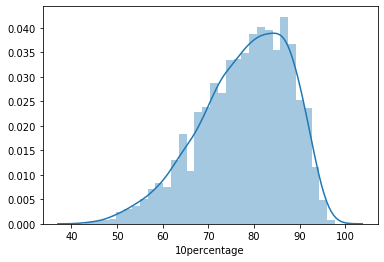

In [87]:
sns.distplot(df['10percentage'])

In [88]:
df['10percentage'] = power_transformer.fit_transform(df[['10percentage']])

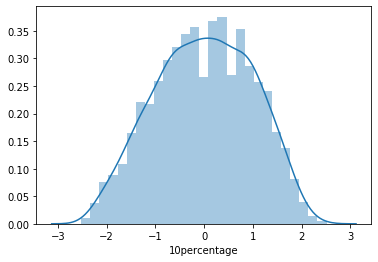

In [89]:
sns.distplot(df['10percentage'])

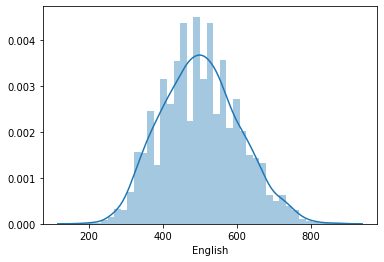

In [90]:
sns.distplot(df['English'])

In [91]:
df['English'] = power_transformer.fit_transform(df[['English']])

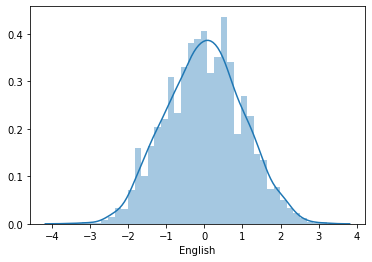

In [92]:
sns.distplot(df['English'])

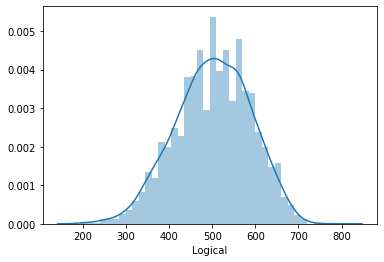

In [93]:
sns.distplot(df['Logical'])

In [94]:
df['Logical'] = power_transformer.fit_transform(df[['Logical']])

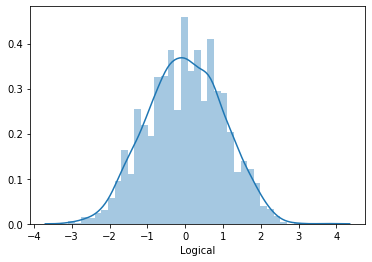

In [95]:
sns.distplot(df['Logical'])

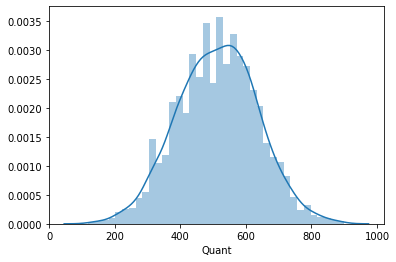

In [96]:
sns.distplot(df['Quant'])

In [97]:
df['Quant'] = power_transformer.fit_transform(df[['Quant']])

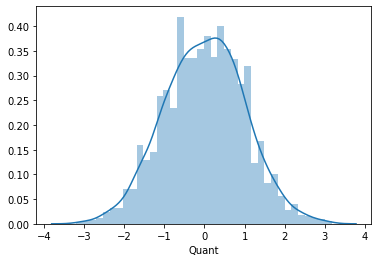

In [98]:
sns.distplot(df['Quant'])

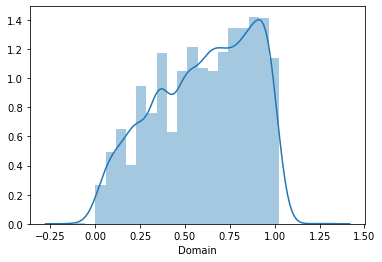

In [99]:
sns.distplot(df['Domain'])

In [100]:
df['Domain'] = power_transformer.fit_transform(df[['Domain']])

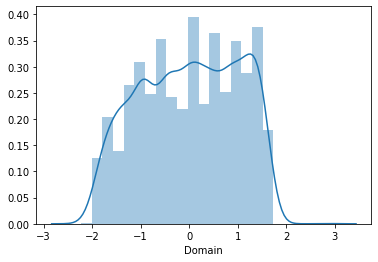

In [101]:
sns.distplot(df['Domain'])

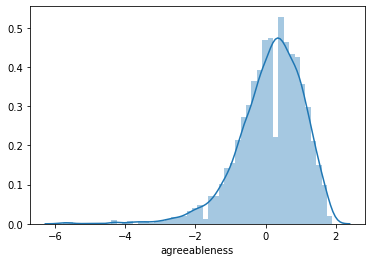

In [102]:
sns.distplot(df['agreeableness'])

In [103]:
df['agreeableness'] = power_transformer.fit_transform(df[['agreeableness']])

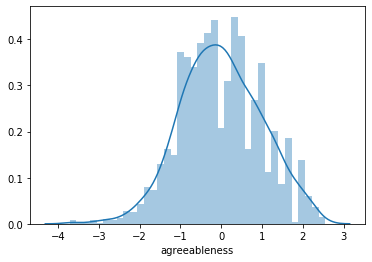

In [104]:
sns.distplot(df['agreeableness'])

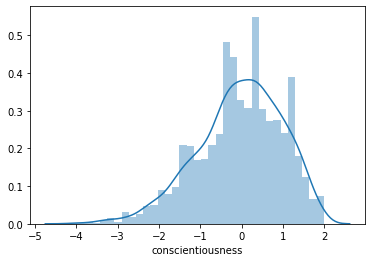

In [105]:
sns.distplot(df['conscientiousness'])

In [106]:
df['conscientiousness'] = power_transformer.fit_transform(df[['conscientiousness']])

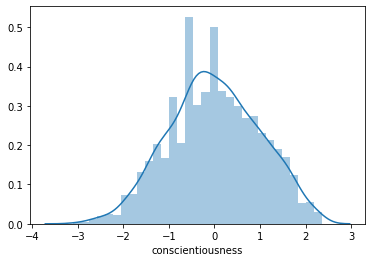

In [107]:
sns.distplot(df['conscientiousness'])

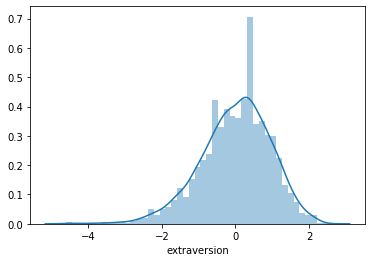

In [108]:
sns.distplot(df['extraversion'])

In [109]:
df['extraversion'] = power_transformer.fit_transform(df[['extraversion']])

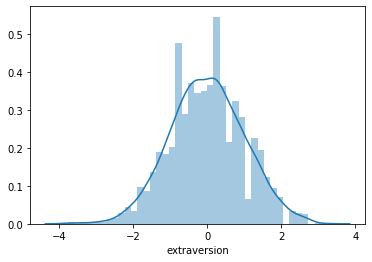

In [110]:
sns.distplot(df['extraversion'])

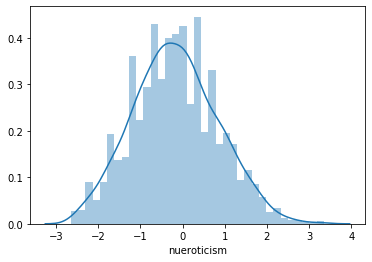

In [111]:
sns.distplot(df['nueroticism'])

In [112]:
df['nueroticism'] = power_transformer.fit_transform(df[['nueroticism']])

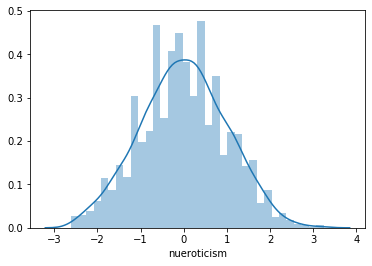

In [113]:
sns.distplot(df['nueroticism'])

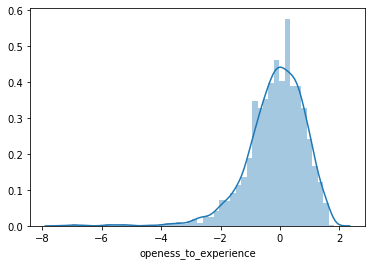

In [114]:
sns.distplot(df['openess_to_experience'])

In [115]:
df['openess_to_experience'] = power_transformer.fit_transform(df[['openess_to_experience']])

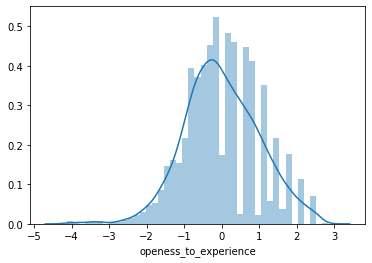

In [116]:
sns.distplot(df['openess_to_experience'])

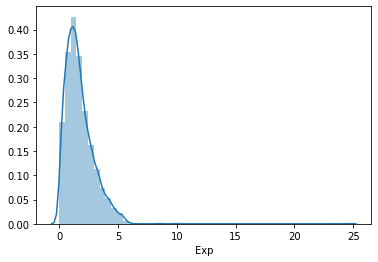

In [117]:
sns.distplot(df['Exp'])

In [118]:
df['Exp'] = power_transformer.fit_transform(df[['Exp']])

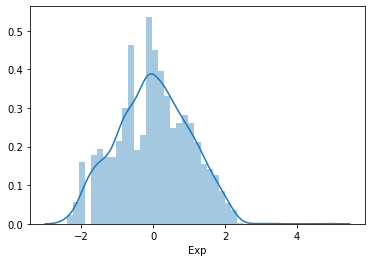

In [119]:
sns.distplot(df['Exp'])

In [120]:
q1_10 = df['10percentage'].quantile(q= 0.25)
q3_10 = df['10percentage'].quantile(q= 0.75)
iqr_10 = q3_10-q1_10
tenthpercentage = df[(df['10percentage']<(q1_10-1.5*iqr_10)) | (df['10percentage']>(q3_10+1.5*iqr_10))].shape[0]
tenthpercentage

0

In [121]:
q1_12 = df['12percentage'].quantile(q= 0.25)
q3_12 = df['12percentage'].quantile(q= 0.75)
iqr_12 = q3_12-q1_12
twelvethpercentage = df[(df['12percentage']<(q1_12-1.5*iqr_12)) | (df['12percentage']>(q3_12+1.5*iqr_12))].shape[0]
twelvethpercentage

1

In [122]:
q1_c = df['collegeGPA'].quantile(q= 0.25)
q3_c = df['collegeGPA'].quantile(q= 0.75)
iqr_c = q3_c-q1_c
CollegeGPA_o = df[(df['collegeGPA']<(q1_c-1.5*iqr_c)) | (df['collegeGPA']>(q3_c+1.5*iqr_c))].shape[0]
CollegeGPA_o

26

In [123]:
q1_e = df['English'].quantile(q= 0.25)
q3_e = df['English'].quantile(q= 0.75)
iqr_e = q3_e-q1_e
English_o = df[(df['English']<(q1_e-1.5*iqr_e)) | (df['English']>(q3_e+1.5*iqr_e))].shape[0]
English_o

10

In [124]:
q1_l = df['Logical'].quantile(q= 0.25)
q3_l = df['Logical'].quantile(q= 0.75)
iqr_l = q3_l-q1_l
Logical_o = df[(df['Logical']<(q1_l-1.5*iqr_l)) | (df['Logical']>(q3_l+1.5*iqr_l))].shape[0]
Logical_o

8

In [125]:
q1_q = df['Quant'].quantile(q= 0.25)
q3_q = df['Quant'].quantile(q= 0.75)
iqr_q = q3_q-q1_q
Quant_o = df[(df['Quant']<(q1_q-1.5*iqr_q)) | (df['Quant']>(q3_q+1.5*iqr_q))].shape[0]
Quant_o

25

In [126]:
q1_d = df['Domain'].quantile(q= 0.25)
q3_d = df['Domain'].quantile(q= 0.75)
iqr_d = q3_d-q1_d
Domain_o = df[(df['Domain']<(q1_d-1.5*iqr_d)) | (df['Domain']>(q3_d+1.5*iqr_d))].shape[0]
Domain_o

0

In [127]:
q1_c = df['conscientiousness'].quantile(q= 0.25)
q3_c = df['conscientiousness'].quantile(q= 0.75)
iqr_c = q3_c-q1_c
conscientiousness_o = df[(df['conscientiousness']<(q1_c-1.5*iqr_c)) | (df['conscientiousness']>(q3_c+1.5*iqr_c))].shape[0]
conscientiousness_o

4

In [128]:
q1_a = df['agreeableness'].quantile(q= 0.25)
q3_a= df['agreeableness'].quantile(q= 0.75)
iqr_a = q3_a-q1_a
agreeableness_o = df[(df['agreeableness']<(q1_a-1.5*iqr_a)) | (df['agreeableness']>(q3_a+1.5*iqr_a))].shape[0]
agreeableness_o

26

In [129]:
q1_ex = df['extraversion'].quantile(q= 0.25)
q3_ex = df['extraversion'].quantile(q= 0.75)
iqr_ex = q3_ex-q1_ex
extraversion_o = df[(df['extraversion']<(q1_ex-1.5*iqr_ex)) | (df['extraversion']>(q3_ex+1.5*iqr_ex))].shape[0]
extraversion_o

17

In [130]:
q1_n = df['nueroticism'].quantile(q= 0.25)
q3_n = df['nueroticism'].quantile(q= 0.75)
iqr_n = q3_n-q1_n
nueroticism_o = df[(df['nueroticism']<(q1_n-1.5*iqr_n)) | (df['nueroticism']>(q3_n+1.5*iqr_n))].shape[0]
nueroticism_o

8

In [131]:
q1_o = df['openess_to_experience'].quantile(q= 0.25)
q3_o = df['openess_to_experience'].quantile(q= 0.75)
iqr_o = q3_o-q1_o
openess_to_experience_o = df[(df['openess_to_experience']<(q1_o-1.5*iqr_o)) | (df['openess_to_experience']>(q3_o+1.5*iqr_o))].shape[0]
openess_to_experience_o

28

In [132]:
q1_exp = df['Exp'].quantile(q= 0.25)
q3_exp = df['Exp'].quantile(q= 0.75)
iqr_exp = q3_exp-q1_exp
Exp_o = df[(df['Exp']<(q1_exp-1.5*iqr_exp)) | (df['Exp']>(q3_exp+1.5*iqr_exp))].shape[0]
Exp_o

3

In [133]:
q1_age = df['Age'].quantile(q= 0.25)
q3_age = df['Age'].quantile(q= 0.75)
iqr_age = q3_age-q1_age
Age_o = df[(df['Age']<(q1_age-1.5*iqr_age)) | (df['Age']>(q3_age+1.5*iqr_age))].shape[0]
Age_o

78

In [134]:
q1_Sc = df['Score'].quantile(q= 0.25)
q3_Sc = df['Score'].quantile(q= 0.75)
iqr_Sc = q3_Sc-q1_Sc
Score_o = df[(df['Score']<(q1_Sc-1.5*iqr_Sc)) | (df['Score']>(q3_Sc+1.5*iqr_Sc))].shape[0]
Score_o

51

In [135]:
Features = ['Salary','10percentage','12percentage','CollegeGPA','English','Logical','Quant','Domain','conscientiousness','agreeableness','extraversion','nueroticism','openess_to_experience','Exp','Age','Score']
No_of_outliers = [Salary_o,tenthpercentage,twelvethpercentage,CollegeGPA_o,English_o,Logical_o,Quant_o,Domain_o,conscientiousness_o,agreeableness_o,extraversion_o,nueroticism_o,openess_to_experience_o,Exp_o,Age_o,Score_o]
Outliers  = pd.DataFrame({'Features':Features,'No_of_Outliers':No_of_outliers})
Outliers

,Features,No_of_Outliers
0,Salary,109
1,10percentage,0
2,12percentage,1
3,CollegeGPA,26
4,English,10
5,Logical,8
6,Quant,25
7,Domain,0
8,conscientiousness,4
9,agreeableness,26


In [136]:
df.to_excel('Ameo_cleaned.xlsx',index=False)

# Univariate:

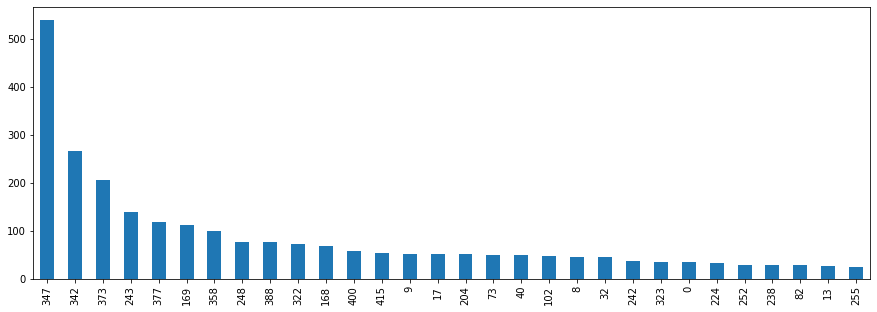

In [137]:
df['Designation'].value_counts().head(30).plot(x='Designation',y='Number of persons',kind='bar',figsize=(15,5))

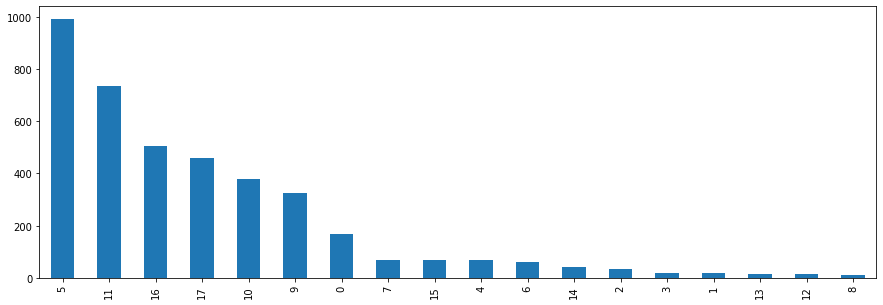

In [138]:
df['JobRegion'].value_counts().head(30).plot(x='City',y='Number of persons',kind='bar',figsize=(15,5))

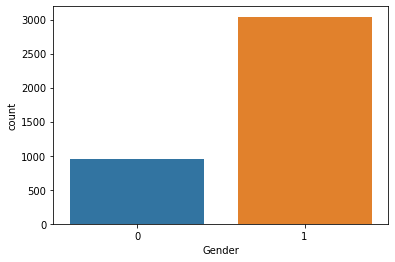

In [139]:
sns.countplot(df['Gender'])

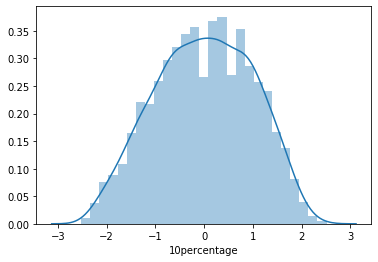

In [140]:
sns.distplot(df['10percentage'])

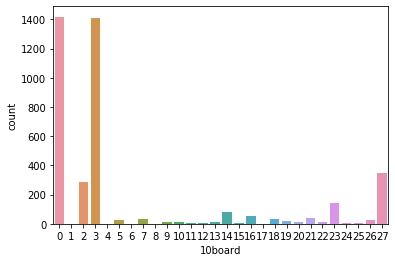

In [141]:
sns.countplot(df['10board'])

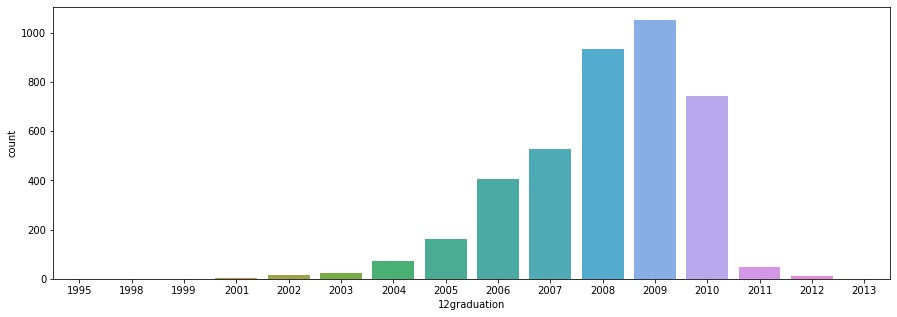

In [142]:
plt.figure(figsize=(15,5))
sns.countplot(df['12graduation'])

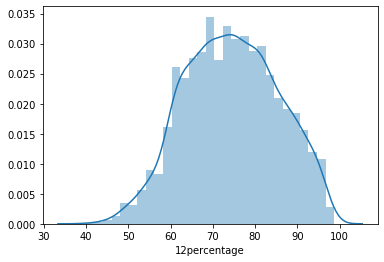

In [143]:
sns.distplot(df['12percentage'])

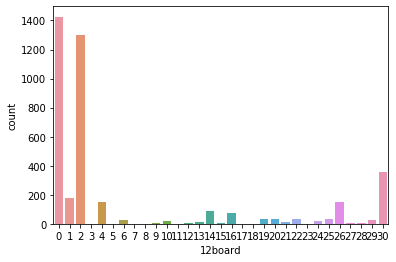

In [144]:
sns.countplot(df['12board'])

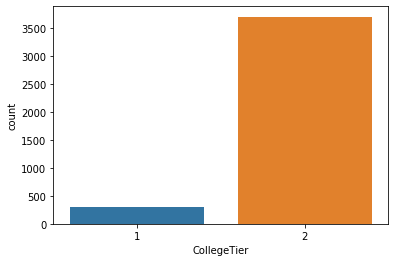

In [145]:
sns.countplot(df['CollegeTier'])

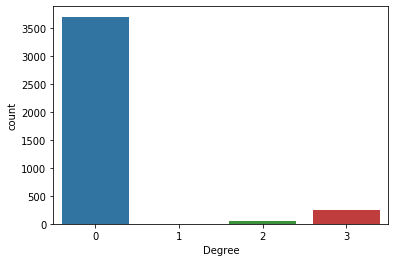

In [146]:
sns.countplot(df['Degree'])

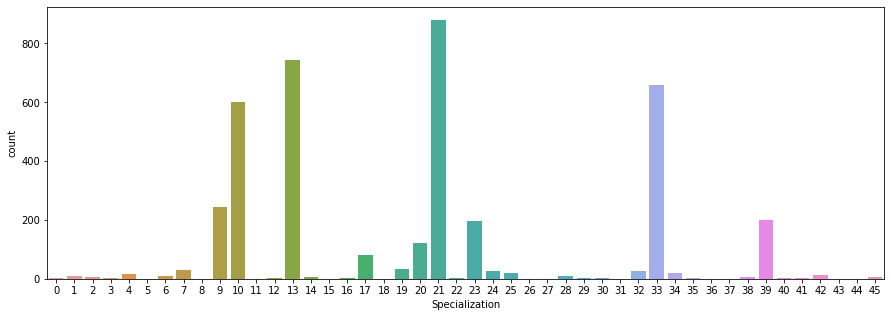

In [147]:
plt.figure(figsize=(15,5))
sns.countplot(df['Specialization'])

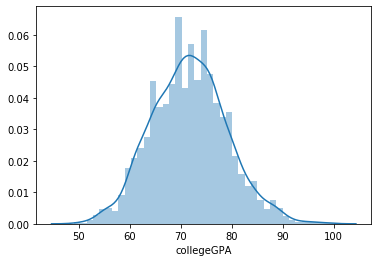

In [148]:
sns.distplot(df['collegeGPA'])

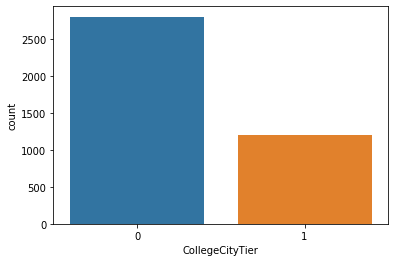

In [149]:
sns.countplot(df['CollegeCityTier'])

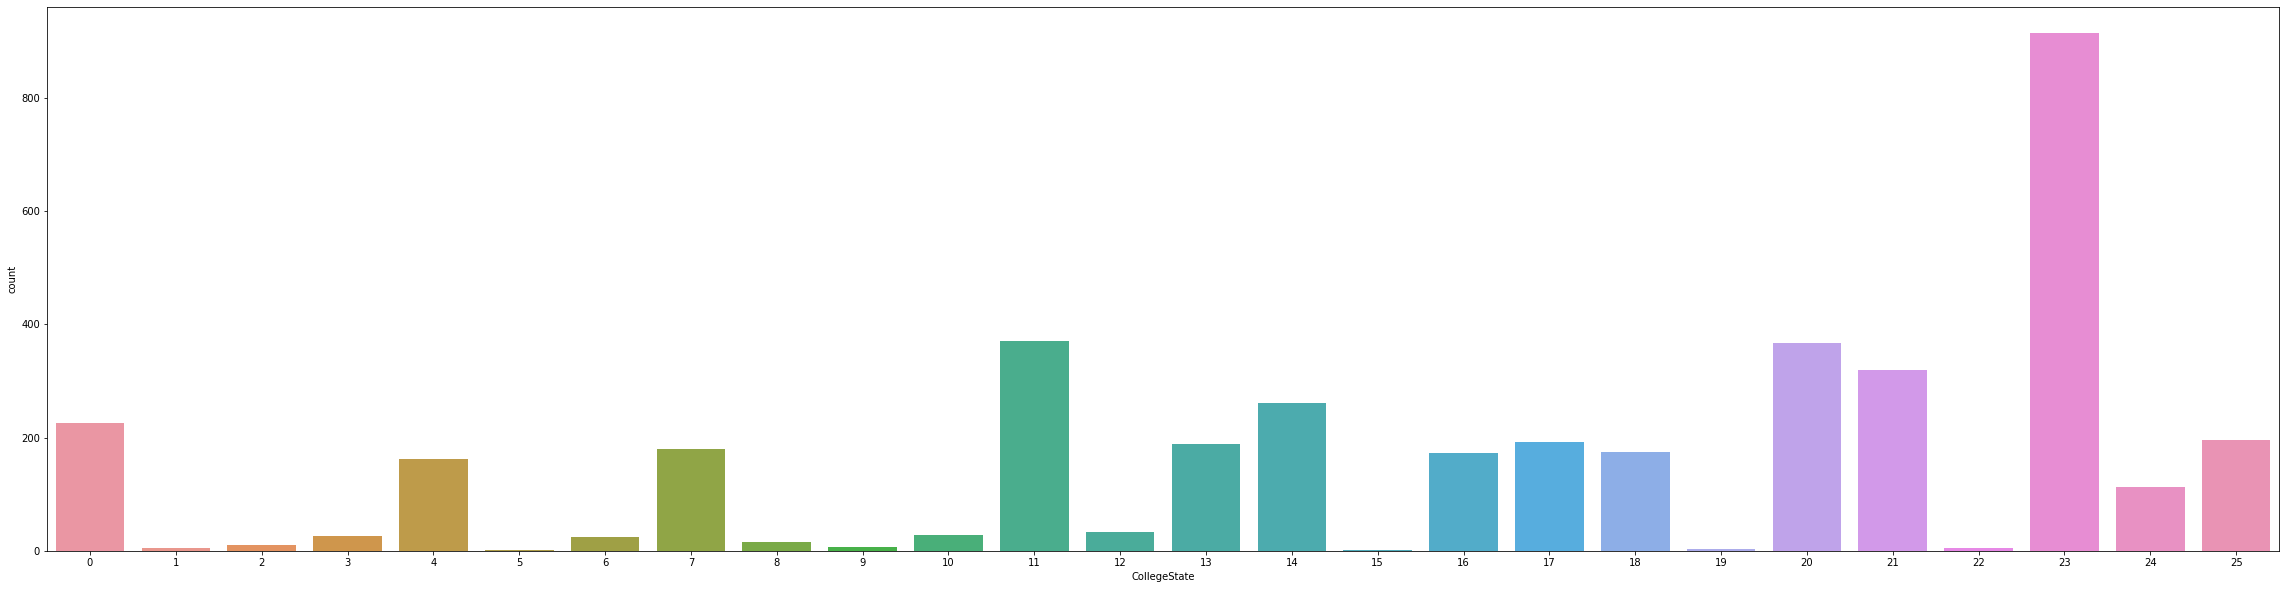

In [150]:
plt.figure(figsize=(40,10))
sns.countplot(df['CollegeState'])

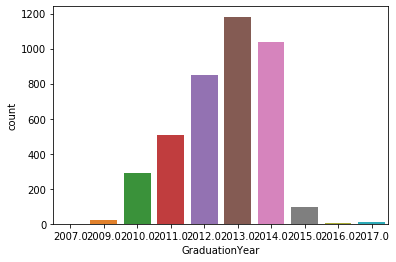

In [151]:
sns.countplot(df['GraduationYear'])

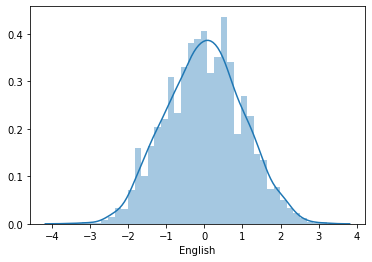

In [152]:
sns.distplot(df['English'])

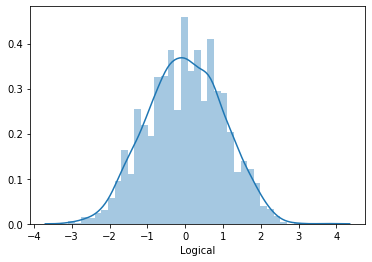

In [153]:
sns.distplot(df['Logical'])

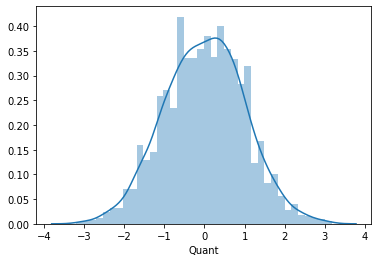

In [154]:
sns.distplot(df['Quant'])

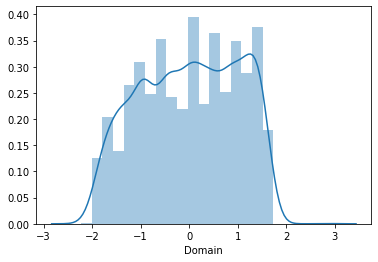

In [155]:
sns.distplot(df['Domain'])

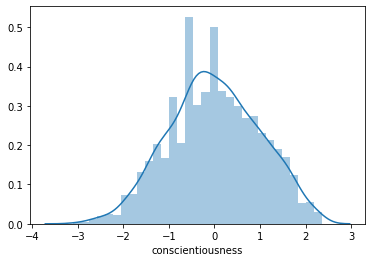

In [156]:
sns.distplot(df['conscientiousness'])

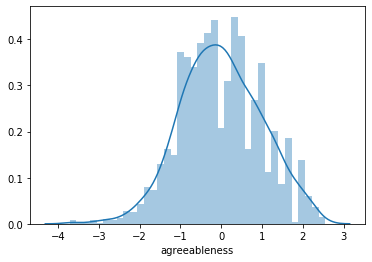

In [157]:
sns.distplot(df['agreeableness'])

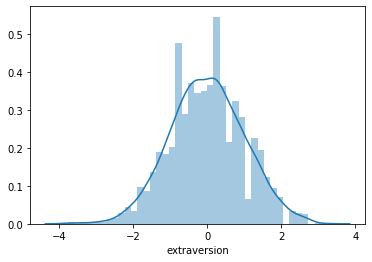

In [158]:
sns.distplot(df['extraversion'])

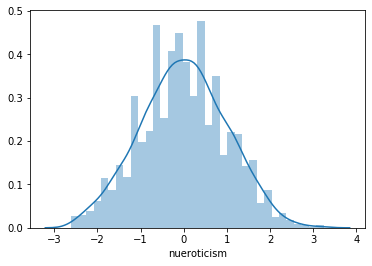

In [159]:
sns.distplot(df['nueroticism'])

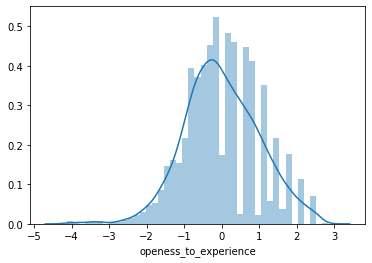

In [160]:
sns.distplot(df['openess_to_experience'])

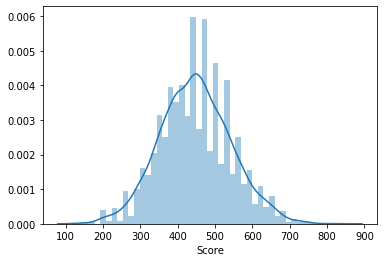

In [161]:
sns.distplot(df['Score'])

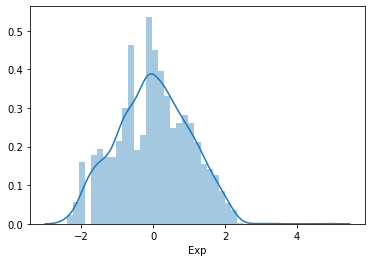

In [162]:
sns.distplot(df['Exp'])

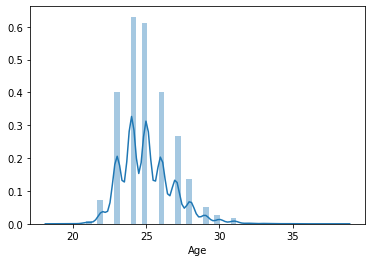

In [163]:
sns.distplot(df['Age'])

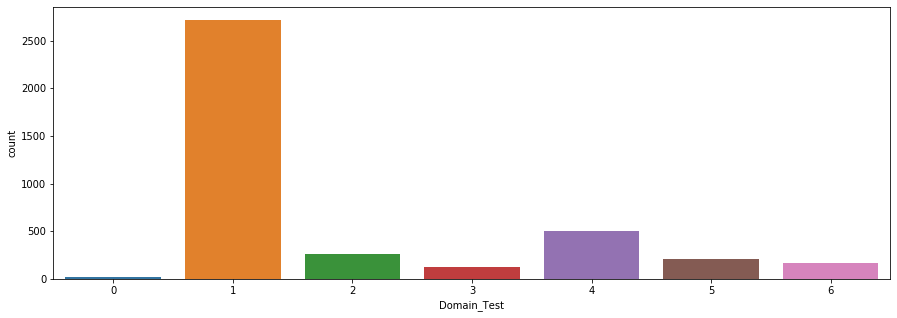

In [164]:
plt.figure(figsize=(15,5))
sns.countplot(df['Domain_Test'])

# Bivariate:

In [165]:
#plt.figure(figsize=(25,5))
#sns.barplot(df['Designation'],df['Salary'],estimator=np.mean)

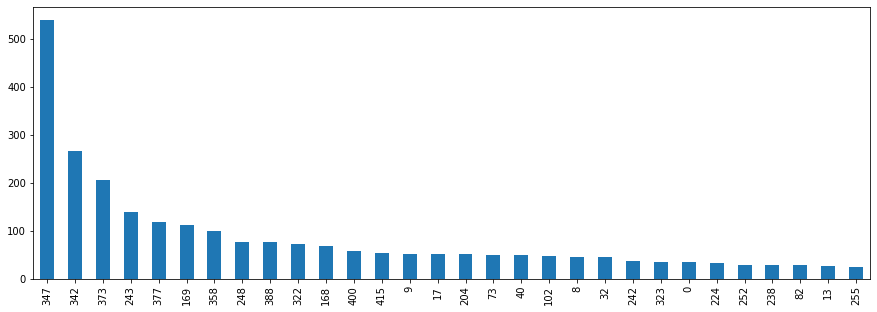

In [166]:
df['Designation'].value_counts().head(30).plot(x='Designation',y='Salary',kind='bar',figsize=(15,5))

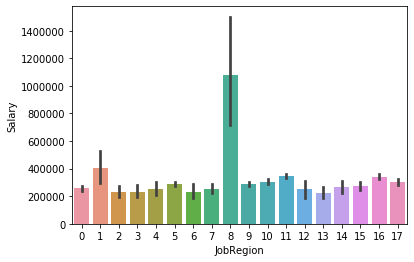

In [167]:
sns.barplot(df['JobRegion'],df['Salary'],estimator=np.mean)

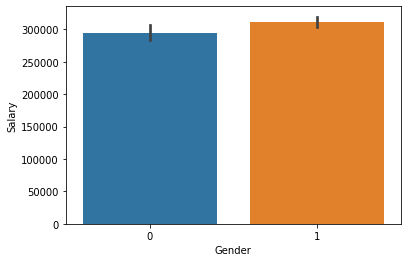

In [168]:
sns.barplot(df['Gender'],df['Salary'],estimator = np.mean)

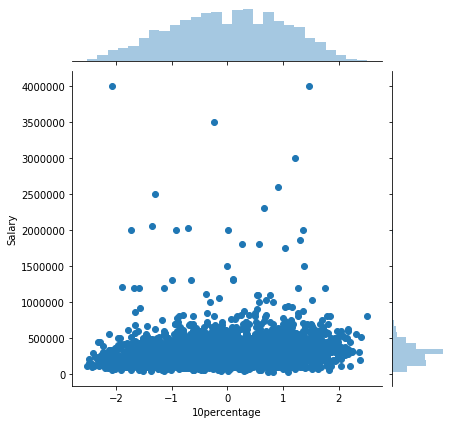

In [169]:
sns.jointplot(df['10percentage'],df['Salary'])

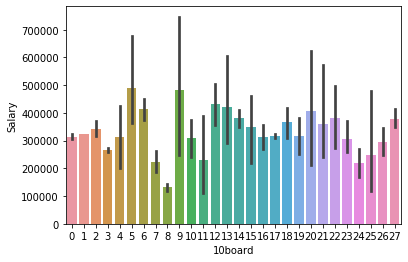

In [170]:
sns.barplot(df['10board'],df['Salary'],estimator=np.mean)

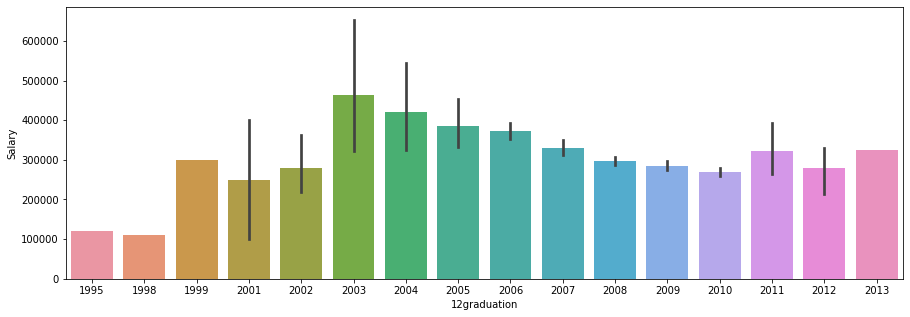

In [171]:
plt.figure(figsize=(15,5))
sns.barplot(df['12graduation'],df['Salary'],estimator=np.mean)

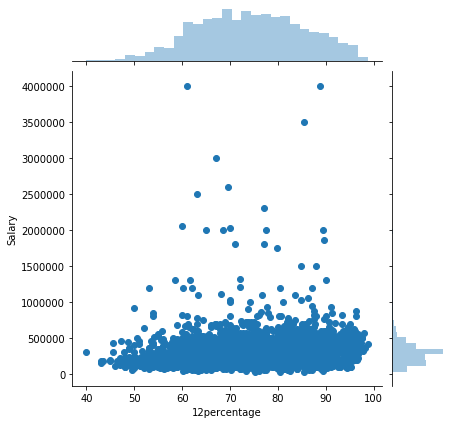

In [172]:
sns.jointplot(df['12percentage'],df['Salary'])

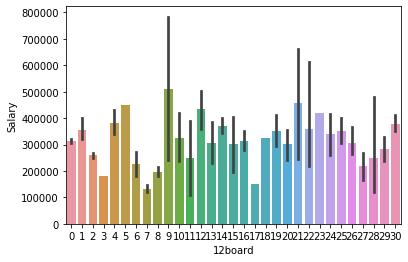

In [173]:
sns.barplot(df['12board'],df['Salary'],estimator=np.mean)

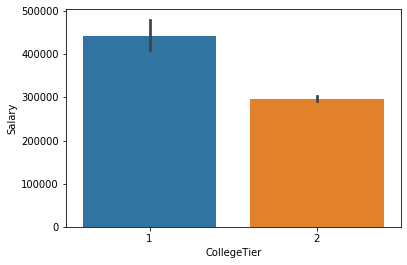

In [174]:
sns.barplot(df['CollegeTier'],df['Salary'],estimator=np.mean)

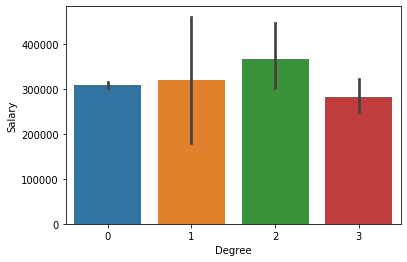

In [175]:
sns.barplot(df['Degree'],df['Salary'],estimator=np.mean)

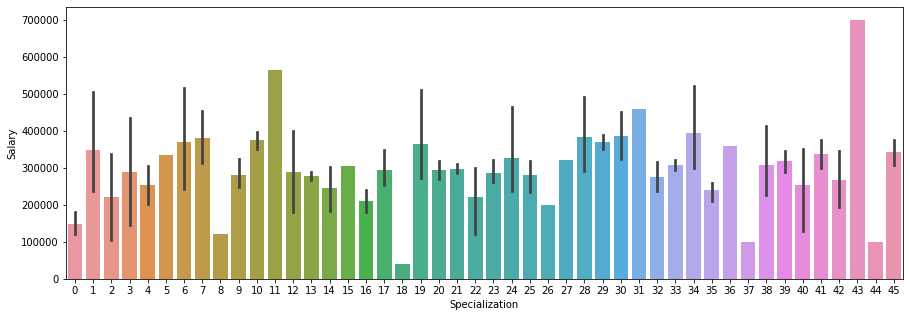

In [176]:
plt.figure(figsize=(15,5))
sns.barplot(df['Specialization'],df['Salary'],estimator=np.mean)

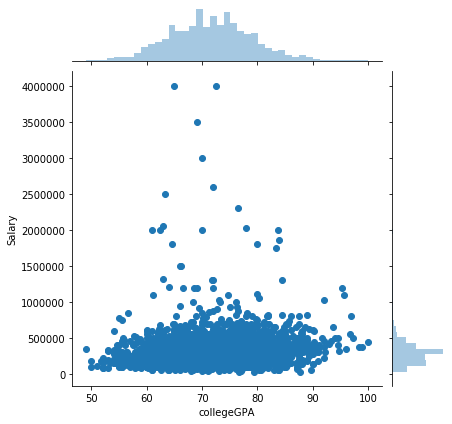

In [177]:
sns.jointplot(df['collegeGPA'],df['Salary'])

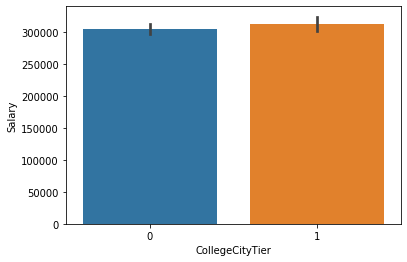

In [178]:
sns.barplot(df['CollegeCityTier'],df['Salary'],estimator = np.mean)

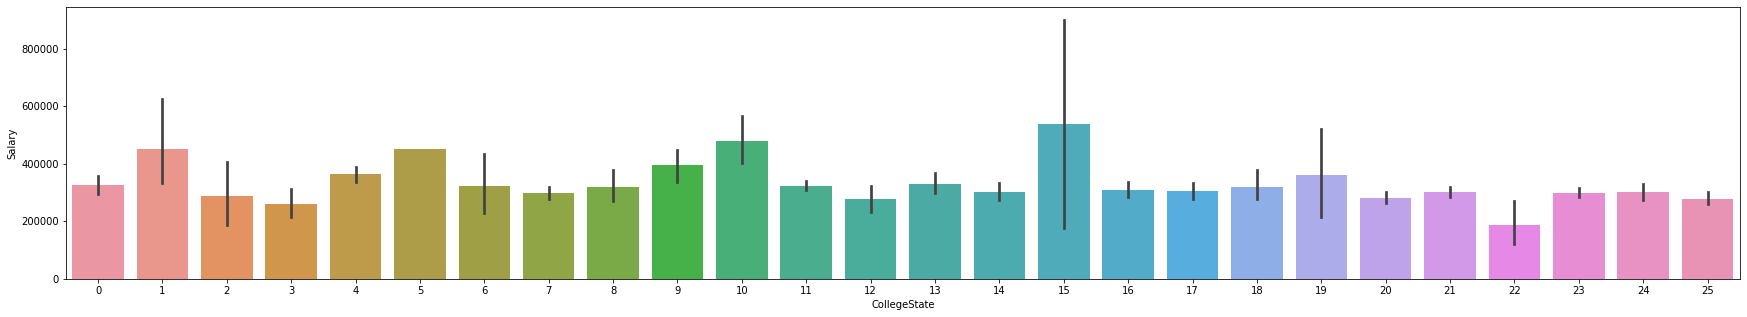

In [179]:
plt.figure(figsize=(30,5))
sns.barplot(df['CollegeState'],df['Salary'],estimator=np.mean)

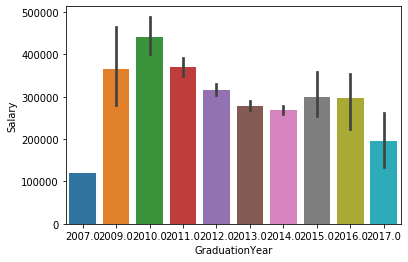

In [180]:
sns.barplot(df['GraduationYear'],df['Salary'],estimator=np.mean)

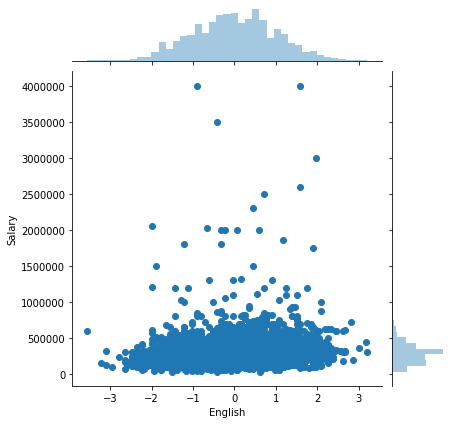

In [181]:
sns.jointplot(df['English'],df['Salary'])

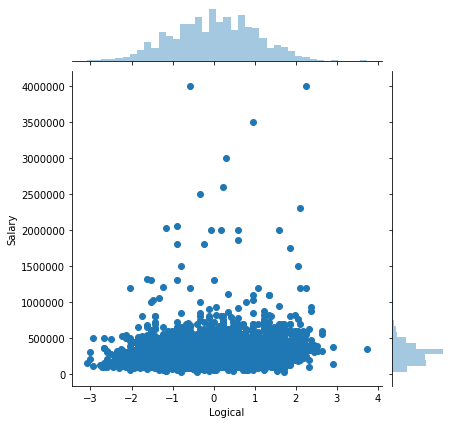

In [182]:
sns.jointplot(df['Logical'],df['Salary'])

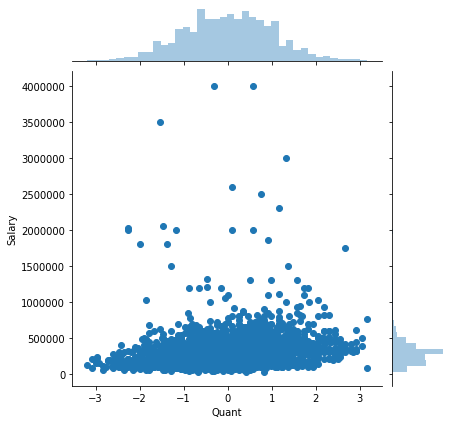

In [183]:
sns.jointplot(df['Quant'],df['Salary'])

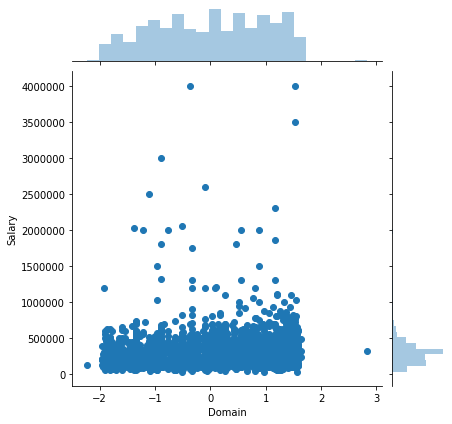

In [184]:
sns.jointplot(df['Domain'],df['Salary'])

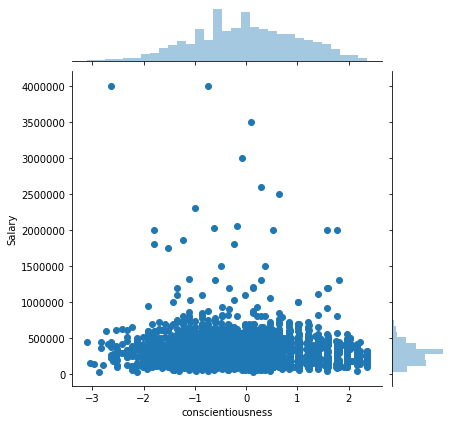

In [185]:
sns.jointplot(df['conscientiousness'],df['Salary'])

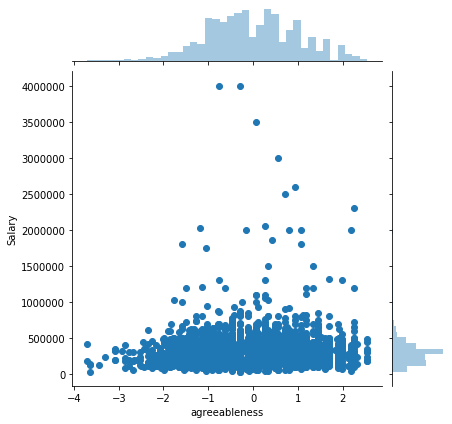

In [186]:
sns.jointplot(df['agreeableness'],df['Salary'])

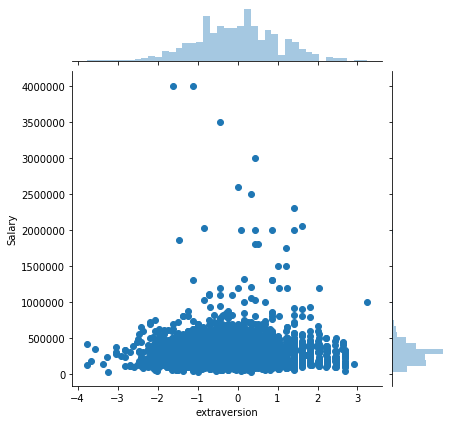

In [187]:
sns.jointplot(df['extraversion'],df['Salary'])

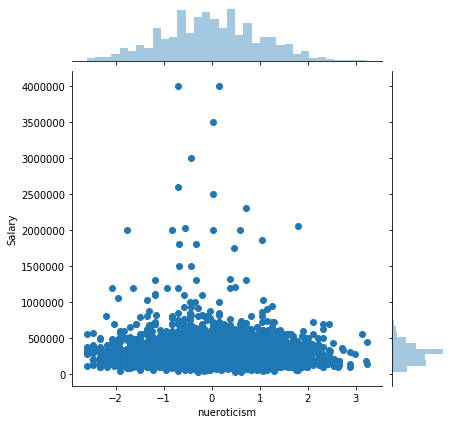

In [188]:
sns.jointplot(df['nueroticism'],df['Salary'])

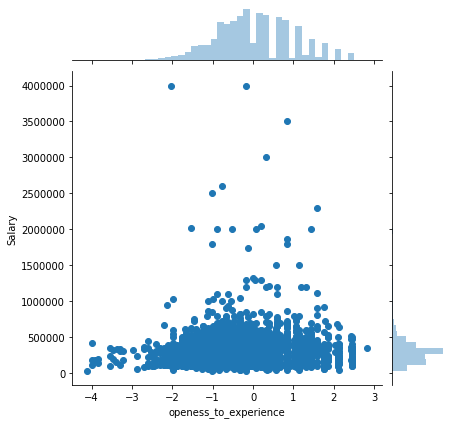

In [189]:
sns.jointplot(df['openess_to_experience'],df['Salary'])

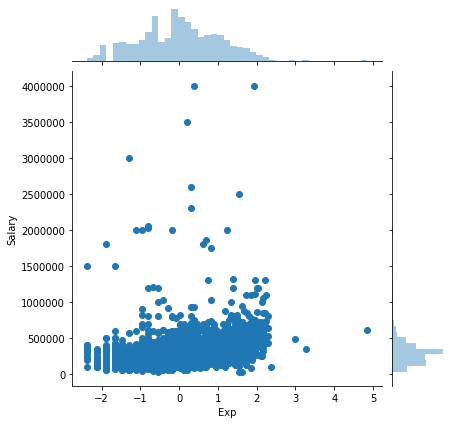

In [190]:
sns.jointplot(df['Exp'],df['Salary'])

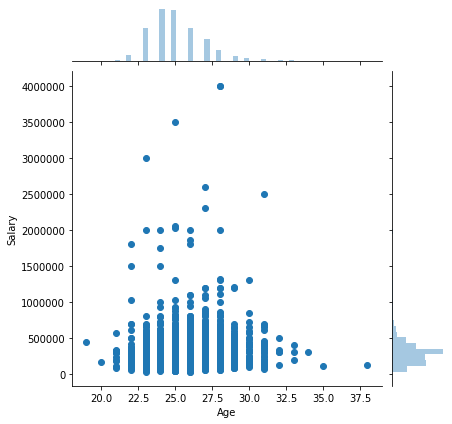

In [191]:
sns.jointplot(df['Age'],df['Salary'])

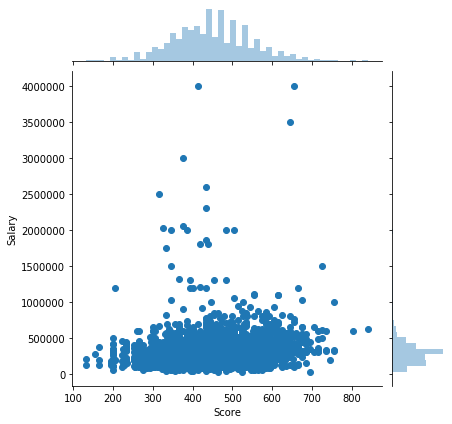

In [192]:
sns.jointplot(df['Score'],df['Salary'])

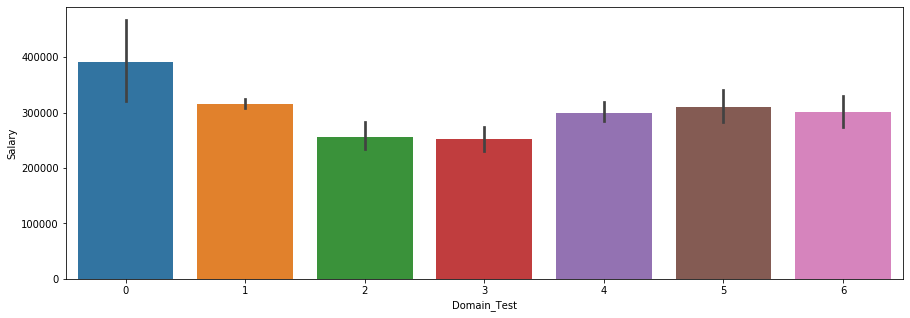

In [193]:
plt.figure(figsize=(15,5))
sns.barplot(df['Domain_Test'],df['Salary'],estimator=np.mean)

## Multivariate:

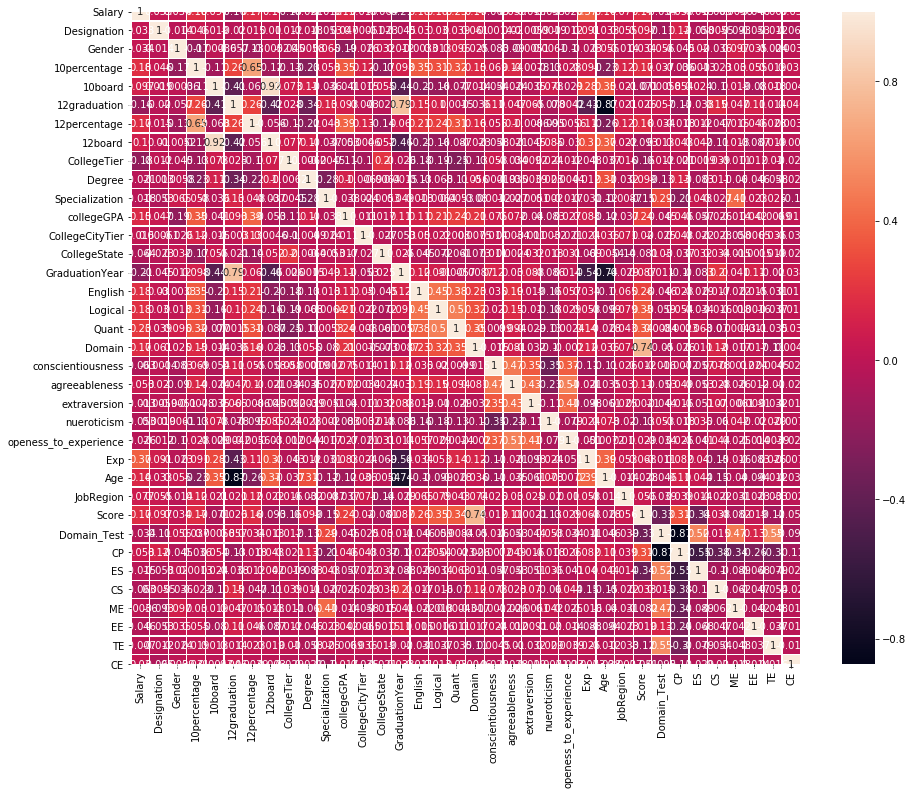

In [194]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True,linewidths=0.3)

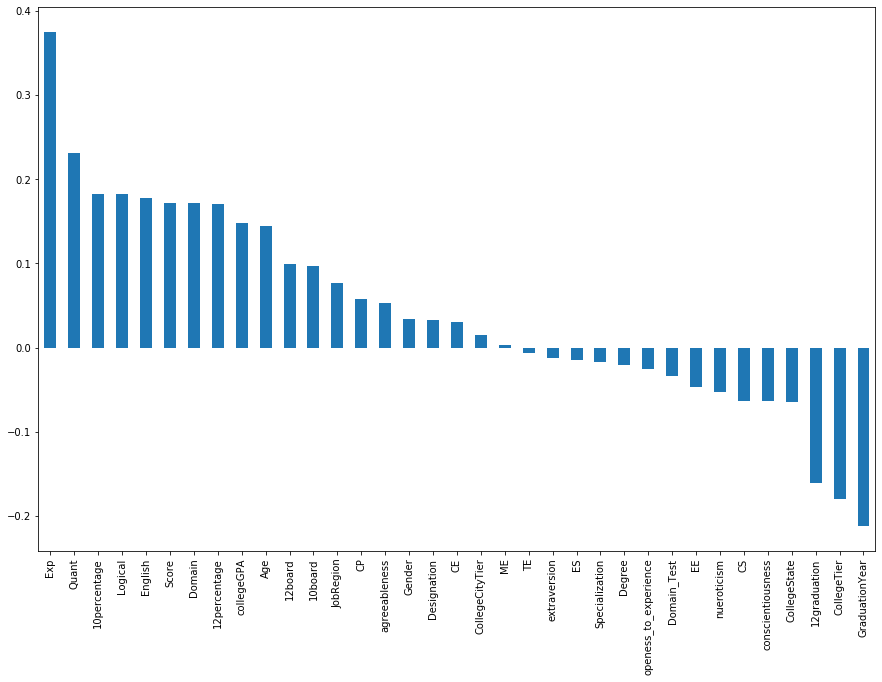

In [195]:
plt.figure(figsize=(15,10))
corr= df.corr()
corr['Salary'].sort_values(ascending=False)[1:].plot(kind='bar')

In [196]:
#sns.pairplot(df,diag_kind='kde')

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000000AA40FBCE18> (for post_execute):


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\USER\Anaconda3\lib\site-packages\IPython\core\events.py", line 88, in trigger
    func(*args, **kwargs)
  File "C:\Users\USER\Anaconda3\lib\site-packages\ipykernel\pylab\backend_inline.py", line 117, in flush_figures
    return show(True)
  File "C:\Users\USER\Anaconda3\lib\site-packages\ipykernel\pylab\backend_inline.py", line 39, in show
    metadata=_fetch_figure_metadata(figure_manager.canvas.figure)
  File "C:\Users\USER\Anaconda3\lib\site-packages\ipykernel\pylab\backend_inline.py", line 177, in _fetch_figure_metadata
    for axes in fig.axes
  File "C:\Users\USER\Anaconda3\lib\site-packages\ipykernel\pylab\backend_inline.py", line 179, in <listcomp>
    for label in axis.get_ticklabels()])
  File "C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axis.py", line 1296, in get_ticklabels
    return self.get_majorticklabels()
  File "C:\Users\USER\Anaconda3\lib\site-packages\matplotlib\axis.py", line 1252, in get_majorticklabels

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(df['Domain_Test'],df['Salary'],hue=df['Gender'])